# Import libraries

In [ ]:
!pip install dash

In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.frequent_patterns import apriori, association_rules
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import KFold
from mlxtend.preprocessing import TransactionEncoder
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
import polars as pl
from tqdm import tqdm
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

# Import Data

In [ ]:
import requests

url = "https://lfs.aminer.cn/misc/moocdata/data/mooccube2/entities/problem.json"
problem_df = pl.read_ndjson(url)
problem_df.head()


problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
i64,str,str,struct[4],str,f64,i64,str,str,list[i64],str,str
1730,"""第一课 导论与三家分晋--习题""","""1、《资治通鉴》卷1记载：智宣子将以瑶为后，智果曰：“……瑶…","{""武艺超群，精通射御之术"",""礼贤下士，虚怀若谷"",""反映敏捷，文辞和口才俱佳"",""敢作敢为，处事果断""}","""[""B""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1731,"""第一课 导论与三家分晋--习题""","""2、《资治通鉴》是一部____史书。""","{""纪传体"",""编年体"",""纪事本末体"",""国别体""}","""[""B""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1732,"""第一课 导论与三家分晋--习题""","""3、《资治通鉴》原名____，后由____赐名“资治通鉴”。""","{""《通鉴》；宋神宗"",""《通志》；宋徽宗"",""《通鉴》；宋徽宗"",""《通志》；宋神宗""}","""[""D""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1733,"""第一课 导论与三家分晋--习题""","""4、“三家分晋”中“三家”具体指：""","{""魏赵韩"",""魏韩智"",""赵韩智"",""魏赵智""}","""[""A""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1734,"""第一课 导论与三家分晋--习题""","""5、智伯联合韩、魏的军队攻打赵氏时，赵襄子选择退守的阵地是：""","{""邯郸"",""长子"",""晋阳"",""皋狼""}","""[""C""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""


In [ ]:
import requests

url = "https://lfs.aminer.cn/misc/moocdata/data/mooccube2/entities/user.json"
user_df = pl.read_ndjson(url)
user_df.head()

id,name,gender,school,year_of_birth,course_order,enroll_time
str,str,i64,str,i64,list[i64],list[str]
"""U_22""","""我""",0,"""""",2015,"[682129, 2294668]","[""2019-10-12 10:28:02"", ""2020-11-21 14:03:28""]"
"""U_24""","""王帅国""",1,"""清华大学""",6558,"[597214, 605512, … 2229905]","[""2019-05-20 16:06:48"", ""2019-05-24 19:34:43"", … ""2020-11-21 11:38:57""]"
"""U_25""","""王帅国""",0,"""清华大学""",null,[1903985],"[""2020-08-07 18:59:13""]"
"""U_53""","""于歆杰""",1,"""清华大学""",1973,"[696679, 1704639, … 1794464]","[""2020-03-01 21:24:30"", ""2020-03-12 16:17:02"", … ""2020-06-18 18:47:15""]"
"""U_54""","""马昱春""",2,"""清华大学""",null,"[682442, 682164, … 1906706]","[""2019-10-09 02:17:49"", ""2019-11-08 00:49:03"", … ""2020-07-20 11:27:28""]"


# Khám phá dữ liệu

## I. Thống kê mô tả

### Sử dụng hàm `shape` để xem kích thước của một DataFrame (số hàng, số cột)

In [ ]:
problem_df.shape

(2454422, 12)

### Sử dụng hàm `info()` để cung cấp một bản tóm tắt ngắn gọn của DataFrame (tên cột, kiểu dữ liệu)

In [ ]:
problem_df = problem_df.to_pandas()

In [ ]:
problem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454422 entries, 0 to 2454421
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   problem_id   int64  
 1   title        object 
 2   content      object 
 3   option       object 
 4   answer       object 
 5   score        float64
 6   type         int64  
 7   typetext     object 
 8   location     object 
 9   context_id   object 
 10  exercise_id  object 
 11  language     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 224.7+ MB


### Kiểm tra giá trị categorical của các trường trong file

In [ ]:
# Hàm kiểm tra trường field_name có bao nhiêu giá trị phân biệt
def check_value_counts(df_to_check, field_name):
  print(df_to_check[field_name].value_counts())

In [ ]:
# Kiểm tra trường typetext có bao nhiêu giá trị categorical -> 7
check_value_counts(problem_df, 'typetext')

typetext
单选题    1421954
判断题     505433
多选题     373565
填空题     112871
主观题      37449
投票题       2869
编程题        281
Name: count, dtype: int64


In [ ]:
# Kiểm tra trường score có bao nhiêu giá trị categorical -> 48
check_value_counts(problem_df, 'score')

score
1.0      1453055
2.0       307644
10.0       37579
5.0        27567
3.0        14992
4.0        13517
0.5        10034
6.0         2705
1.5         2344
8.0         2106
20.0        1800
0.0         1796
7.0          839
15.0         681
2.5          539
9.0          371
12.5         310
12.0         292
30.0         231
100.0        206
0.8          196
0.2          157
25.0         147
0.3          145
50.0         138
3.5          128
11.0          83
35.0          74
13.0          72
17.0          55
40.0          39
14.0          39
16.0          28
4.5           23
33.0          20
60.0          20
5.5           15
34.0          12
22.0           8
28.0           8
18.0           7
55.0           6
7.5            5
80.0           4
11.5           4
24.0           3
70.0           3
9.5            3
Name: count, dtype: int64


In [ ]:
# Kiểm tra trường type có bao nhiêu giá trị categorical -> 7
check_value_counts(problem_df, 'type')

type
1    1421943
6     506384
2     373580
4     111956
5      37409
3       2869
9        281
Name: count, dtype: int64


In [ ]:
# Kiểm tra trường title có bao nhiêu giá trị categorical -> 33817
check_value_counts(problem_df, 'title')

title
作业               14161
测试题              10616
习题                8316
课后习题              7723
第八讲  多元的性--习题     6600
                 ...  
第一节 抗高血压药-选择         1
完善数据库                1
上机作业1                1
test                 1
作业功能测试               1
Name: count, Length: 33871, dtype: int64


In [ ]:
# Kiểm tra trường score có bao nhiêu giá trị categorical -> 2
check_value_counts(problem_df, 'language')

language
Chinese    2210105
English     244317
Name: count, dtype: int64


### Dùng hàm `isnull()` để kiểm tra giá trị null ở mỗi cột

Kiểm tra giá trị null ở tất cả các cột trên toàn bộ data

In [ ]:
problem_df.isnull().sum() # Kiểm tra tất cả giá trị null có ở từng trường

,0
problem_id,0
title,0
content,0
option,149564
answer,0
score,574372
type,0
typetext,0
location,0
context_id,0


In [ ]:
problem_df.isnull().mean() # Tính tỉ lệ giá trị null có ở từng trường

,0
problem_id,0.000000
title,0.000000
content,0.000000
option,0.060937
answer,0.000000
score,0.234015
type,0.000000
typetext,0.000000
location,0.000000
context_id,0.000000


<ipython-input-17-ad98b5f3ca5d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")


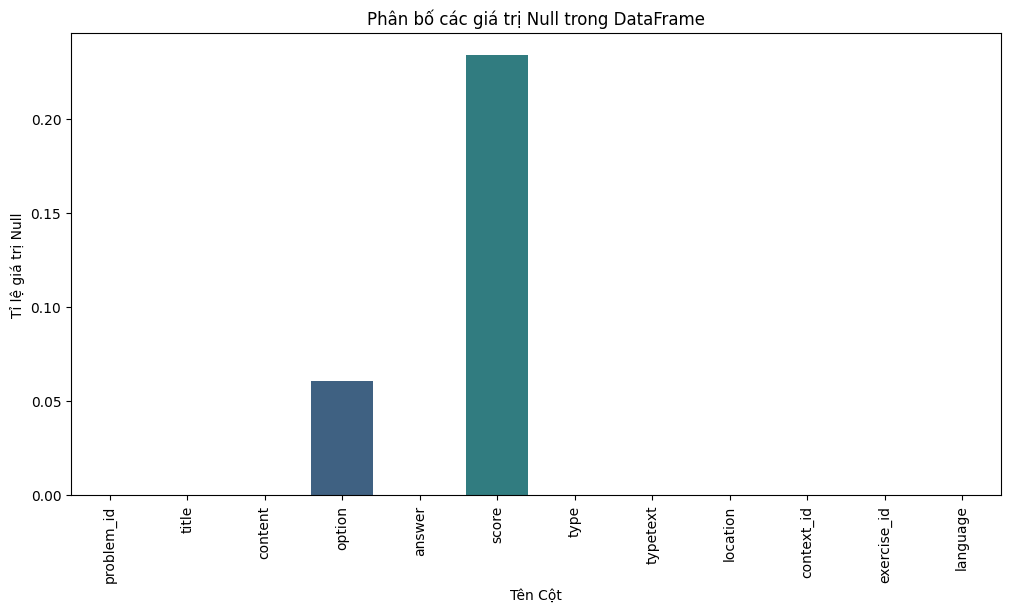

In [ ]:
null_percentage = problem_df.isnull().mean()
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Phân bố các giá trị Null trong DataFrame")
plt.xlabel("Tên Cột")
plt.ylabel("Tỉ lệ giá trị Null")
plt.show()

Nhận xét:
- Dựa theo biểu đồ, ta dễ dàng thấy được và nắm rõ hơn về số lượng các giá trị khuyết trong mỗi cột. Với cột score, giá trị khuyết chiếm hơn 20% dữ liệu trong cột. Số lượng giá trị khuyết trong cột score là khá lớn, ảnh hưởng rất nhiều đến bộ dữ liệu nếu chúng ta loại bỏ hoặc sử dụng các cách khác để khôi phục dữ liệu.
- Với cột option, giá trị khuyết chiếm hơn 5% dữ liệu trong cột. Các giá trị null trong cột option là các đáp án của mỗi câu bài tập, vì thế chúng ta không có giải pháp nào để có thể xử lý khôi phục hay điền khuyết cho các giá trị này

In [ ]:
# Tiến hành xóa các dòng có giá trị null ở cột option
problem_df.dropna(subset = ['option'], inplace=True)

### Tính toán một số thống kê cơ bản

In [ ]:
# Hàm describe()
problem_df.describe()

,problem_id,score,type
count,2.304858e+06,1.763562e+06,2.304858e+06
mean,4.376555e+06,1.337395e+00,2.263198e+00
std,2.748672e+06,1.246367e+00,2.016014e+00
min,1.730000e+03,0.000000e+00,1.000000e+00
25%,1.755092e+06,1.000000e+00,1.000000e+00
50%,3.716814e+06,1.000000e+00,1.000000e+00
75%,7.189943e+06,1.000000e+00,2.000000e+00
max,8.431753e+06,1.000000e+02,6.000000e+00


In [ ]:
    # Thống kê điểm số theo ngôn ngữ
    print(problem_df.groupby('language')['score'].describe())

              count      mean       std  min  25%  50%  75%    max
language                                                          
Chinese   1590368.0  1.352005  1.231007  0.0  1.0  1.0  1.0  100.0
English    173194.0  1.203235  1.372189  0.0  1.0  1.0  1.0   50.0


Nhận xét:
Thống kê điểm theo 'language' cho thấy đa số các bài tập ở dưới dạng tiếng Trung (1590368 bài tập), các bài tập theo dạng tiếng Anh chỉ chiếm phần nhỏ (173194 bài tập)

In [ ]:
import numpy as np


In [ ]:
# Tìm min
min_score = np.min(problem_df['score'])
print(f"Min of score: {min_score}")

# Tìm max
max_score = np.max(problem_df['score'])
print(f"Max of score: {max_score}")

# Tính mean - trung bình
mean_score = np.mean(problem_df['score'])
print(f"Mean of score: {mean_score}")

# Tính std - độ lệch chuẩn
std_score = np.std(problem_df['score'])
print(f"Std of score: {std_score}")

# Tính percentile - tứ phân vị
percentile_score = np.percentile(problem_df['score'], [25, 50, 75])
print(f"Percentile of score: {percentile_score}")

Min of score: 0.0
Max of score: 100.0
Mean of score: 1.337394715921527
Std of score: 1.2463663078315192
Percentile of score: [nan nan nan]


Nhận xét:
* Giá trị `min`, `max`, `mean`, `std`, `percentile` tính bằng các hàm của numpy và dùng hàm `describe()` đều giống nhau.


### Thể hiện phân phối dữ liệu bằng biểu đồ phân phối cho các loại dữ liệu không liên tục
* Sử dụng hàm `bar()` của matplotlib

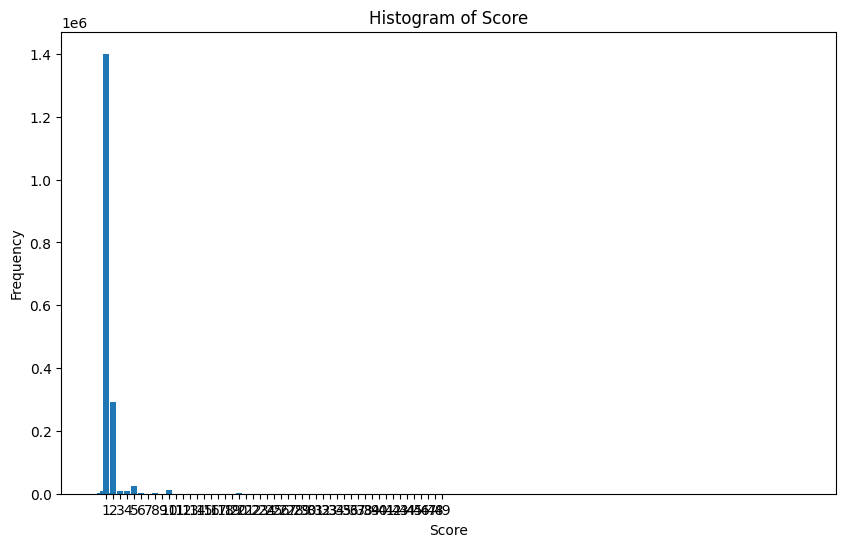

In [ ]:
# Biểu đồ cho score
plt.figure(figsize=(10, 6))
score_counts = problem_df['score'].value_counts()
plt.bar(score_counts.index, score_counts)
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks( range(1, 50))
plt.show()

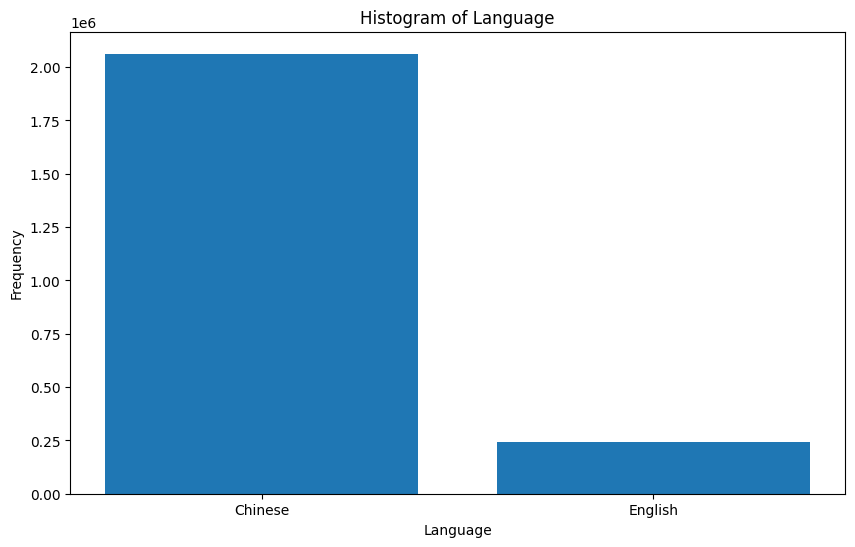

In [ ]:
# Biểu đồ cho language
plt.figure(figsize=(10, 6))
language_counts = problem_df['language'].value_counts()

plt.bar(language_counts.index, language_counts.values)
plt.title('Histogram of Language')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()

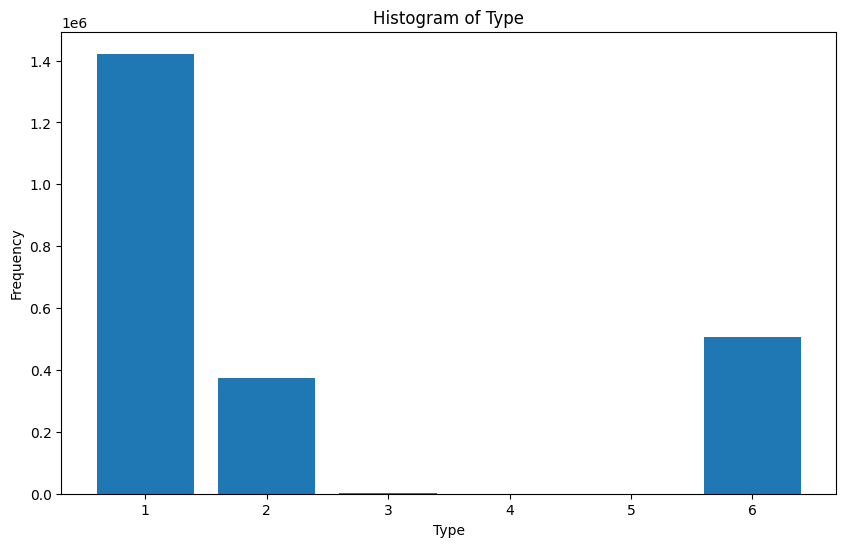

In [ ]:
# Biểu đồ cho type
plt.figure(figsize=(10, 6))
type_counts = problem_df['type'].value_counts()

plt.bar(type_counts.index, type_counts.values)
plt.title('Histogram of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

Nhận xét:
- Số lượng câu hỏi bài tập bằng tiếng Trung chiếm tỷ lệ áp đảo so với dạng tiếng Anh, vì đây là nền tảng học trực tuyến của Trung Quốc nên điều này là hiển nhiên.
- Dạng câu hỏi 1.0 chiếm số lượng lớn nhất, tiếp theo đó sẽ là dạng câu hỏi 2.0 và dạng câu hỏi 5.0 ở vị trí thứ 2 và 3 => dữ liệu phân bố không đồng đều.
- Dựa vào hai biểu đồ chúng ta có thể đưa ra được đánh giá khái quát về dữ liệu trong hai cột language và type có sự chênh lệch rất lớn
- Trường type có giá trị 1 là lớn nhất, sau đó lần lượt là 6 và 2.


### Giá trị ngoại lai (outlier)
Sau khi thống kê sơ bộ, chúng tôi thấy ở **problem.json** chỉ có trường **score** là có ý nghĩa số học (do có kiểu dữ liệu float64) trong khi các dữ liệu còn lại là chuỗi hoặc là categorical, do đó các trường này không có giá trị ngoại lai. Hơn nữa, mặc dù trường score có sự mất cân bằng trong phân bố, tuy nhiên các giá trị của chúng không gì bất thường, không ảnh hưởng đến dữ liệu do nó phụ thuộc vào tính chất của câu hỏi, thang điểm đánh giá và do đó không thể xem như giá trị ngoại lai (outlier).

## II. Trực quan hóa dữ liệu

In [ ]:
path = "/kaggle/input/mooccubex-user/user.json"

with open(path, "r") as file:
    data = file.readlines()  # Đọc tất cả các dòng
# chuyển object thành dictionary
data = [json.loads(line) for line in data]
# chuyển dictionary thành Dataframe
df = pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Thống kê mô tả chung về dữ liệu

#### 1.1 Trích Xuất Thông Tin Từ Các Cột Dạng Danh Sách (List)

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,school,year_of_birth,course_order,enroll_time
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]"
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201..."
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13]
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202..."
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202..."
...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202..."
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08]
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36]
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05]


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3330294, 7)

In [ ]:
df.info(show_counts=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330294 entries, 0 to 3330293
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             3330294 non-null  object 
 1   name           3330240 non-null  object 
 2   gender         3330240 non-null  float64
 3   school         3330240 non-null  object 
 4   year_of_birth  48530 non-null    float64
 5   course_order   3330294 non-null  object 
 6   enroll_time    3330294 non-null  object 
dtypes: float64(2), object(5)
memory usage: 177.9+ MB


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                     0
name                  54
gender                54
school                54
year_of_birth    3281764
course_order           0
enroll_time            0
dtype: int64

In [ ]:
df.isnull().mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id               0.000000
name             0.000016
gender           0.000016
school           0.000016
year_of_birth    0.985428
course_order     0.000000
enroll_time      0.000000
dtype: float64

In [ ]:
# Lọc các dòng có name bị NaN
nan_name_df = df[df["name"].isna()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Kiểm tra gender và school có NaN khi name NaN không
nan_counts = nan_name_df[["gender", "school"]].isna().sum()

# Hiển thị kết quả
print("Số lượng dòng có 'name' bị NaN và các cột khác bị NaN:")
print(nan_counts)

Số lượng dòng có 'name' bị NaN và các cột khác bị NaN:
gender    54
school    54
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Thêm tổng số lượng khóa học cho mỗi người dùng


In [ ]:
# Giả định df là DataFrame ban đầu
df["number_of_courses"] = df["course_order"].apply(lambda courses: len(courses) if isinstance(courses, list) else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df[["id","name", "gender", "school", "year_of_birth", "course_order", "enroll_time", "number_of_courses"]].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201...",65
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13],1
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202...",9


##### Tách thông tin ngày, tháng, năm và thời gian từ cột enroll_time

In [ ]:
import pandas as pd

# Tách năm (year_enroll) từ enroll_time và chuyển về dạng số nguyên
df["year_enroll"] = df["enroll_time"].apply(lambda dates: [int(date.split(" ")[0].split("-")[0]) for date in dates])

# Tách tháng (month_enroll) từ enroll_time và chuyển về dạng số nguyên
df["month_enroll"] = df["enroll_time"].apply(lambda dates: [int(date.split(" ")[0].split("-")[1]) for date in dates])

# Tách ngày (day_enroll) từ enroll_time và chuyển về dạng số nguyên
df["day_enroll"] = df["enroll_time"].apply(lambda dates: [int(date.split(" ")[0].split("-")[2]) for date in dates])

# Tách thời gian (time_enroll) từ enroll_time (dạng chuỗi HH:MM:SS)
df["time_enroll"] = df["enroll_time"].apply(lambda dates: [date.split(" ")[1] for date in dates])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses,year_enroll,month_enroll,day_enroll,time_enroll
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2,"[2019, 2020]","[10, 11]","[12, 21]","[10:28:02, 14:03:28]"
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201...",65,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[5, 5, 6, 6, 6, 8, 8, 8, 9, 10, 10, 10, 10, 10...","[20, 24, 11, 12, 17, 15, 15, 15, 11, 6, 8, 9, ...","[16:06:48, 19:34:43, 02:50:04, 17:22:07, 15:22..."
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13],1,[2020],[8],[7],[18:59:13]
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[3, 3, 3, 3, 4, 4, 6, 6]","[1, 12, 17, 25, 12, 30, 8, 18]","[21:24:30, 16:17:02, 08:46:12, 19:27:50, 07:47..."
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202...",9,"[2019, 2019, 2020, 2020, 2020, 2020, 2020, 202...","[10, 11, 4, 5, 6, 6, 6, 6, 7]","[9, 8, 15, 6, 8, 12, 13, 13, 20]","[02:17:49, 00:49:03, 09:12:56, 19:30:08, 20:37..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202...",3,"[2020, 2020, 2020]","[10, 10, 10]","[12, 12, 12]","[03:39:14, 03:41:00, 03:41:23]"
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08],1,[2020],[10],[12],[03:46:08]
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36],1,[2020],[10],[12],[03:51:36]
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05],1,[2020],[10],[12],[03:57:05]


##### Tính khoảng cách (số ngày) giữa các lần đăng ký khóa học

In [ ]:
# Hàm tính khoảng cách (số ngày) giữa các lần đăng ký khóa học
def compute_intervals(years, months, days):
    if not years or len(years) < 2:  # Xử lý trường hợp danh sách rỗng hoặc người dùng chỉ có một khóa học
        return None

    # Chuyển đổi thành các đối tượng datetime, đảm bảo kiểu dữ liệu chính xác
    dates = sorted([pd.Timestamp(year=int(y), month=int(m), day=int(d))
                    for y, m, d in zip(years, months, days)])

    # Tính khoảng cách (số ngày) giữa các lần đăng ký liên tiếp
    intervals = [(dates[i+1] - dates[i]).days for i in range(len(dates)-1)]

    return intervals

# Áp dụng hàm compute_intervals() cho từng dòng của DataFrame để tạo cột intervals_course
df["intervals_course"] = df.apply(lambda row: compute_intervals(row["year_enroll"], row["month_enroll"], row["day_enroll"]), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses,year_enroll,month_enroll,day_enroll,time_enroll,intervals_course
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2,"[2019, 2020]","[10, 11]","[12, 21]","[10:28:02, 14:03:28]",[406]
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201...",65,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[5, 5, 6, 6, 6, 8, 8, 8, 9, 10, 10, 10, 10, 10...","[20, 24, 11, 12, 17, 15, 15, 15, 11, 6, 8, 9, ...","[16:06:48, 19:34:43, 02:50:04, 17:22:07, 15:22...","[4, 18, 1, 5, 59, 0, 0, 27, 25, 2, 1, 2, 2, 5,..."
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13],1,[2020],[8],[7],[18:59:13],None
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[3, 3, 3, 3, 4, 4, 6, 6]","[1, 12, 17, 25, 12, 30, 8, 18]","[21:24:30, 16:17:02, 08:46:12, 19:27:50, 07:47...","[11, 5, 8, 18, 18, 39, 10]"
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202...",9,"[2019, 2019, 2020, 2020, 2020, 2020, 2020, 202...","[10, 11, 4, 5, 6, 6, 6, 6, 7]","[9, 8, 15, 6, 8, 12, 13, 13, 20]","[02:17:49, 00:49:03, 09:12:56, 19:30:08, 20:37...","[30, 159, 21, 33, 4, 1, 0, 37]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202...",3,"[2020, 2020, 2020]","[10, 10, 10]","[12, 12, 12]","[03:39:14, 03:41:00, 03:41:23]","[0, 0]"
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08],1,[2020],[10],[12],[03:46:08],None
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36],1,[2020],[10],[12],[03:51:36],None
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05],1,[2020],[10],[12],[03:57:05],None


##### Thêm cột giá trị nhỏ nhất, giá trị lớn nhất, trung bình của mỗi lần đăng kí khóa học của học sinh


In [ ]:
# Hàm tính khoảng cách lớn nhất, nhỏ nhất và trung bình giữa các lần đăng ký
def calculate_stats(intervals):
    if intervals is None or len(intervals) == 0:
        return None, None, None  # Xử lý trường hợp không có dữ liệu hoặc danh sách rỗng

    return max(intervals), min(intervals), round(np.mean(intervals), 2)  # Tính giá trị lớn nhất, nhỏ nhất và trung bình (làm tròn 2 chữ số thập phân)

# Áp dụng hàm calculate_stats để tạo các cột mới trong DataFrame
df[['max_interval', 'min_interval', 'avg_interval']] = df['intervals_course'].apply(lambda x: pd.Series(calculate_stats(x)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses,year_enroll,month_enroll,day_enroll,time_enroll,intervals_course,max_interval,min_interval,avg_interval
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2,"[2019, 2020]","[10, 11]","[12, 21]","[10:28:02, 14:03:28]",[406],406.0,406.0,406.00
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201...",65,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[5, 5, 6, 6, 6, 8, 8, 8, 9, 10, 10, 10, 10, 10...","[20, 24, 11, 12, 17, 15, 15, 15, 11, 6, 8, 9, ...","[16:06:48, 19:34:43, 02:50:04, 17:22:07, 15:22...","[4, 18, 1, 5, 59, 0, 0, 27, 25, 2, 1, 2, 2, 5,...",65.0,0.0,8.61
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13],1,[2020],[8],[7],[18:59:13],None,NaN,NaN,NaN
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[3, 3, 3, 3, 4, 4, 6, 6]","[1, 12, 17, 25, 12, 30, 8, 18]","[21:24:30, 16:17:02, 08:46:12, 19:27:50, 07:47...","[11, 5, 8, 18, 18, 39, 10]",39.0,5.0,15.57
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202...",9,"[2019, 2019, 2020, 2020, 2020, 2020, 2020, 202...","[10, 11, 4, 5, 6, 6, 6, 6, 7]","[9, 8, 15, 6, 8, 12, 13, 13, 20]","[02:17:49, 00:49:03, 09:12:56, 19:30:08, 20:37...","[30, 159, 21, 33, 4, 1, 0, 37]",159.0,0.0,35.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202...",3,"[2020, 2020, 2020]","[10, 10, 10]","[12, 12, 12]","[03:39:14, 03:41:00, 03:41:23]","[0, 0]",0.0,0.0,0.00
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08],1,[2020],[10],[12],[03:46:08],None,NaN,NaN,NaN
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36],1,[2020],[10],[12],[03:51:36],None,NaN,NaN,NaN
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05],1,[2020],[10],[12],[03:57:05],None,NaN,NaN,NaN


##### Phân loại thời gian đăng kí theo buổi “sáng”, “chiều”, “tối”


In [ ]:
def classify_time_of_day(times):
    """Phân loại từng thời điểm trong danh sách thành buổi sáng, chiều hoặc tối."""
    if not times or not isinstance(times, list):
        return None  # Xử lý trường hợp danh sách rỗng hoặc dữ liệu không hợp lệ

    time_categories = []
    for time in times:
        if isinstance(time, str) and ":" in time:  # Đảm bảo dữ liệu là chuỗi thời gian hợp lệ
            hour = int(time.split(":")[0])  # Trích xuất giờ từ chuỗi thời gian
            if 5 <= hour < 12:
                time_categories.append("morning")  # Từ 5h đến trước 12h là buổi sáng
            elif 12 <= hour < 18:
                time_categories.append("afternoon")  # Từ 12h đến trước 18h là buổi chiều
            else:
                time_categories.append("night")  # Từ 18h trở đi là buổi tối
        else:
            time_categories.append(None)  # Xử lý dữ liệu thời gian bị lỗi hoặc không hợp lệ

    return time_categories

# Áp dụng hàm để phân loại thời gian trong từng dòng của DataFrame
df["time_of_day"] = df["time_enroll"].apply(classify_time_of_day)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses,year_enroll,month_enroll,day_enroll,time_enroll,intervals_course,max_interval,min_interval,avg_interval,time_of_day
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2,"[2019, 2020]","[10, 11]","[12, 21]","[10:28:02, 14:03:28]",[406],406.0,406.0,406.00,"[morning, afternoon]"
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201...",65,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[5, 5, 6, 6, 6, 8, 8, 8, 9, 10, 10, 10, 10, 10...","[20, 24, 11, 12, 17, 15, 15, 15, 11, 6, 8, 9, ...","[16:06:48, 19:34:43, 02:50:04, 17:22:07, 15:22...","[4, 18, 1, 5, 59, 0, 0, 27, 25, 2, 1, 2, 2, 5,...",65.0,0.0,8.61,"[afternoon, night, night, afternoon, afternoon..."
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13],1,[2020],[8],[7],[18:59:13],None,NaN,NaN,NaN,[night]
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[3, 3, 3, 3, 4, 4, 6, 6]","[1, 12, 17, 25, 12, 30, 8, 18]","[21:24:30, 16:17:02, 08:46:12, 19:27:50, 07:47...","[11, 5, 8, 18, 18, 39, 10]",39.0,5.0,15.57,"[night, afternoon, morning, night, morning, af..."
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202...",9,"[2019, 2019, 2020, 2020, 2020, 2020, 2020, 202...","[10, 11, 4, 5, 6, 6, 6, 6, 7]","[9, 8, 15, 6, 8, 12, 13, 13, 20]","[02:17:49, 00:49:03, 09:12:56, 19:30:08, 20:37...","[30, 159, 21, 33, 4, 1, 0, 37]",159.0,0.0,35.62,"[night, night, morning, night, night, afternoo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202...",3,"[2020, 2020, 2020]","[10, 10, 10]","[12, 12, 12]","[03:39:14, 03:41:00, 03:41:23]","[0, 0]",0.0,0.0,0.00,"[night, night, night]"
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08],1,[2020],[10],[12],[03:46:08],None,NaN,NaN,NaN,[night]
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36],1,[2020],[10],[12],[03:51:36],None,NaN,NaN,NaN,[night]
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05],1,[2020],[10],[12],[03:57:05],None,NaN,NaN,NaN,[night]


##### Thêm cột giá trị trung bình cho tất cả các tháng mỗi người dùng tham gia & năm bắt đầu khóa học đầu tiên

In [ ]:
# Hàm tính năm đầu tiên đăng ký và trung bình tháng đăng ký
def calculate_year_month(years, months):
    year_start = min(years) if years else None  # Tìm năm đăng ký sớm nhất
    avg_month = round(np.mean(months), 2) if months else None  # Tính trung bình tháng đăng ký (làm tròn 2 chữ số thập phân)
    return year_start, avg_month

# Áp dụng hàm calculate_year_month cho từng dòng để tạo các cột year_start và avg_month_enroll
df[['year_start', 'avg_month_enroll']] = df.apply(lambda row: pd.Series(calculate_year_month(row['year_enroll'], row['month_enroll'])), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses,year_enroll,month_enroll,day_enroll,time_enroll,intervals_course,max_interval,min_interval,avg_interval,time_of_day,year_start,avg_month_enroll
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2,"[2019, 2020]","[10, 11]","[12, 21]","[10:28:02, 14:03:28]",[406],406.0,406.0,406.00,"[morning, afternoon]",2019.0,10.50
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201...",65,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[5, 5, 6, 6, 6, 8, 8, 8, 9, 10, 10, 10, 10, 10...","[20, 24, 11, 12, 17, 15, 15, 15, 11, 6, 8, 9, ...","[16:06:48, 19:34:43, 02:50:04, 17:22:07, 15:22...","[4, 18, 1, 5, 59, 0, 0, 27, 25, 2, 1, 2, 2, 5,...",65.0,0.0,8.61,"[afternoon, night, night, afternoon, afternoon...",2019.0,6.38
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13],1,[2020],[8],[7],[18:59:13],None,NaN,NaN,NaN,[night],2020.0,8.00
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[3, 3, 3, 3, 4, 4, 6, 6]","[1, 12, 17, 25, 12, 30, 8, 18]","[21:24:30, 16:17:02, 08:46:12, 19:27:50, 07:47...","[11, 5, 8, 18, 18, 39, 10]",39.0,5.0,15.57,"[night, afternoon, morning, night, morning, af...",2020.0,4.00
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202...",9,"[2019, 2019, 2020, 2020, 2020, 2020, 2020, 202...","[10, 11, 4, 5, 6, 6, 6, 6, 7]","[9, 8, 15, 6, 8, 12, 13, 13, 20]","[02:17:49, 00:49:03, 09:12:56, 19:30:08, 20:37...","[30, 159, 21, 33, 4, 1, 0, 37]",159.0,0.0,35.62,"[night, night, morning, night, night, afternoo...",2019.0,6.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202...",3,"[2020, 2020, 2020]","[10, 10, 10]","[12, 12, 12]","[03:39:14, 03:41:00, 03:41:23]","[0, 0]",0.0,0.0,0.00,"[night, night, night]",2020.0,10.00
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08],1,[2020],[10],[12],[03:46:08],None,NaN,NaN,NaN,[night],2020.0,10.00
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36],1,[2020],[10],[12],[03:51:36],None,NaN,NaN,NaN,[night],2020.0,10.00
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05],1,[2020],[10],[12],[03:57:05],None,NaN,NaN,NaN,[night],2020.0,10.00


##### Thêm cột ngày đầu tiên đăng kí , ngày cuối cùng đăng kí khóa học và khoảng cách giữa ngày đầu tiên đăng kí và ngày cuối cùng đăng kí

In [ ]:
def safe_timestamp(year, month, day):
    """Tạo timestamp hợp lệ, xử lý các giá trị ngày không hợp lệ."""
    try:
        return pd.Timestamp(year, month, day)  # Tạo đối tượng timestamp
    except ValueError:  # Nếu giá trị ngày không hợp lệ
        print(year, month, day)  # In ra để kiểm tra lỗi
        return pd.NaT  # Trả về NaT (Not a Time) để xử lý dữ liệu bị lỗi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df["first_enroll"] = df.apply(lambda row: safe_timestamp(row["year_enroll"][0],
                                                         row["month_enroll"][0],
                                                         row["day_enroll"][0]), axis=1)

df["latest_enroll"] = df.apply(lambda row: safe_timestamp(row["year_enroll"][-1],
                                                           row["month_enroll"][-1],
                                                           row["day_enroll"][-1]), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/forma

,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses,year_enroll,month_enroll,...,time_enroll,intervals_course,max_interval,min_interval,avg_interval,time_of_day,year_start,avg_month_enroll,first_enroll,latest_enroll
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2,"[2019, 2020]","[10, 11]",...,"[10:28:02, 14:03:28]",[406],406.0,406.0,406.00,"[morning, afternoon]",2019.0,10.50,2019-10-12,2020-11-21
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201...",65,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[5, 5, 6, 6, 6, 8, 8, 8, 9, 10, 10, 10, 10, 10...",...,"[16:06:48, 19:34:43, 02:50:04, 17:22:07, 15:22...","[4, 18, 1, 5, 59, 0, 0, 27, 25, 2, 1, 2, 2, 5,...",65.0,0.0,8.61,"[afternoon, night, night, afternoon, afternoon...",2019.0,6.38,2019-05-20,2020-11-21
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13],1,[2020],[8],...,[18:59:13],None,NaN,NaN,NaN,[night],2020.0,8.00,2020-08-07,2020-08-07
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[3, 3, 3, 3, 4, 4, 6, 6]",...,"[21:24:30, 16:17:02, 08:46:12, 19:27:50, 07:47...","[11, 5, 8, 18, 18, 39, 10]",39.0,5.0,15.57,"[night, afternoon, morning, night, morning, af...",2020.0,4.00,2020-03-01,2020-06-18
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202...",9,"[2019, 2019, 2020, 2020, 2020, 2020, 2020, 202...","[10, 11, 4, 5, 6, 6, 6, 6, 7]",...,"[02:17:49, 00:49:03, 09:12:56, 19:30:08, 20:37...","[30, 159, 21, 33, 4, 1, 0, 37]",159.0,0.0,35.62,"[night, night, morning, night, night, afternoo...",2019.0,6.78,2019-10-09,2020-07-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202...",3,"[2020, 2020, 2020]","[10, 10, 10]",...,"[03:39:14, 03:41:00, 03:41:23]","[0, 0]",0.0,0.0,0.00,"[night, night, night]",2020.0,10.00,2020-10-12,2020-10-12
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08],1,[2020],[10],...,[03:46:08],None,NaN,NaN,NaN,[night],2020.0,10.00,2020-10-12,2020-10-12
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36],1,[2020],[10],...,[03:51:36],None,NaN,NaN,NaN,[night],2020.0,10.00,2020-10-12,2020-10-12
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05],1,[2020],[10],...,[03:57:05],None,NaN,NaN,NaN,[night],2020.0,10.00,2020-10-12,2020-10-12


##### Thêm cột khoảng cách giữa ngày đầu tiên đăng kí và ngày cuối cùng đăng kí

In [ ]:
df["enrollment_duration_days"] = (df["latest_enroll"] - df["first_enroll"]).dt.days

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/forma

,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses,year_enroll,month_enroll,...,intervals_course,max_interval,min_interval,avg_interval,time_of_day,year_start,avg_month_enroll,first_enroll,latest_enroll,enrollment_duration_days
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2,"[2019, 2020]","[10, 11]",...,[406],406.0,406.0,406.00,"[morning, afternoon]",2019.0,10.50,2019-10-12,2020-11-21,406
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201...",65,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[5, 5, 6, 6, 6, 8, 8, 8, 9, 10, 10, 10, 10, 10...",...,"[4, 18, 1, 5, 59, 0, 0, 27, 25, 2, 1, 2, 2, 5,...",65.0,0.0,8.61,"[afternoon, night, night, afternoon, afternoon...",2019.0,6.38,2019-05-20,2020-11-21,551
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13],1,[2020],[8],...,None,NaN,NaN,NaN,[night],2020.0,8.00,2020-08-07,2020-08-07,0
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[3, 3, 3, 3, 4, 4, 6, 6]",...,"[11, 5, 8, 18, 18, 39, 10]",39.0,5.0,15.57,"[night, afternoon, morning, night, morning, af...",2020.0,4.00,2020-03-01,2020-06-18,109
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202...",9,"[2019, 2019, 2020, 2020, 2020, 2020, 2020, 202...","[10, 11, 4, 5, 6, 6, 6, 6, 7]",...,"[30, 159, 21, 33, 4, 1, 0, 37]",159.0,0.0,35.62,"[night, night, morning, night, night, afternoo...",2019.0,6.78,2019-10-09,2020-07-20,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202...",3,"[2020, 2020, 2020]","[10, 10, 10]",...,"[0, 0]",0.0,0.0,0.00,"[night, night, night]",2020.0,10.00,2020-10-12,2020-10-12,0
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08],1,[2020],[10],...,None,NaN,NaN,NaN,[night],2020.0,10.00,2020-10-12,2020-10-12,0
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36],1,[2020],[10],...,None,NaN,NaN,NaN,[night],2020.0,10.00,2020-10-12,2020-10-12,0
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05],1,[2020],[10],...,None,NaN,NaN,NaN,[night],2020.0,10.00,2020-10-12,2020-10-12,0


#### 1.2 Thống kê số lượng cơ bản

##### Sử dụng describe cho dữ liệu dạng số

In [ ]:
df.info(show_counts=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330294 entries, 0 to 3330293
Data columns (total 22 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        3330294 non-null  object 
 1   name                      2258111 non-null  object 
 2   gender                    3330240 non-null  float64
 3   school                    1128397 non-null  object 
 4   year_of_birth             48530 non-null    float64
 5   course_order              3330294 non-null  object 
 6   enroll_time               3330294 non-null  object 
 7   number_of_courses         3330294 non-null  int64  
 8   year_enroll               3330294 non-null  object 
 9   month_enroll              3330294 non-null  object 
 10  day_enroll                3330294 non-null  object 
 11  time_enroll               3330294 non-null  object 
 12  intervals_course          1198696 non-null  object 
 13  max_interval              1

In [ ]:
df.describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
gender,3330240.0,0.945575,0.832110,0.0,0.0,1.00,2.00,232.0
year_of_birth,48530.0,2039.016299,358.674303,1111.0,2020.0,2020.00,2020.00,9989.0
number_of_courses,3330294.0,3.545360,10.480855,1.0,1.0,1.00,2.00,3715.0
max_interval,1198696.0,50.242424,71.070381,0.0,0.0,17.00,72.00,456.0
min_interval,1198696.0,18.757496,50.418957,0.0,0.0,0.00,5.00,456.0
avg_interval,1198696.0,28.127005,52.326759,0.0,0.0,6.92,30.43,456.0
year_start,3330294.0,2019.858755,0.348275,2019.0,2020.0,2020.00,2020.00,2020.0
avg_month_enroll,3330294.0,5.062096,3.202856,1.0,2.0,4.00,7.87,12.0
enrollment_duration_days,3330294.0,30.015766,82.355940,0.0,0.0,0.00,1.00,679.0


##### Thống kê các loại và số lượng trong các cột là categorial

In [ ]:
import pandas as pd

# Lọc danh sách các cột có kiểu dữ liệu object hoặc category
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
print("Categorical Columns:", categorical_columns)

# Đếm số lần xuất hiện của từng giá trị trong các cột liên quan
gender_counts = df["gender"].value_counts(dropna=False)
school_counts = df["school"].value_counts(dropna=False)
year_start_counts = df["year_start"].value_counts(dropna=False)

# Hiển thị kết quả
print("\nGender Counts:\n", gender_counts)
print("\nSchool Counts:\n", school_counts)
print("\nYear Start Counts:\n", year_start_counts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Categorical Columns: Index(['id', 'name', 'school', 'course_order', 'enroll_time', 'year_enroll',
       'month_enroll', 'day_enroll', 'time_enroll', 'intervals_course',
       'time_of_day', 'first_enroll', 'latest_enroll'],
      dtype='object')

Gender Counts:
 gender
0.0      1221931
1.0      1067858
2.0      1040449
NaN           54
232.0          1
3.0            1
Name: count, dtype: int64

School Counts:
 school
NaN                2201897
清华大学                 18412
昆明理工大学               15351
湖南大学                 13388
河南工业大学               10198
                    ...   
江苏建康职业学院                 1
蔡志杰                      1
成安县综合职业技术学校              1
贵州民族大学人文科技学院新校区          1
皖医医学院                    1
Name: count, Length: 24971, dtype: int64

Year Start Counts:
 year_start
2020.0    2859905
2019.0     470389
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


#### 1.3 Phân tích phân phối dữ liệu

Phân phối **số lượng khóa học** trên **mỗi người dùng**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


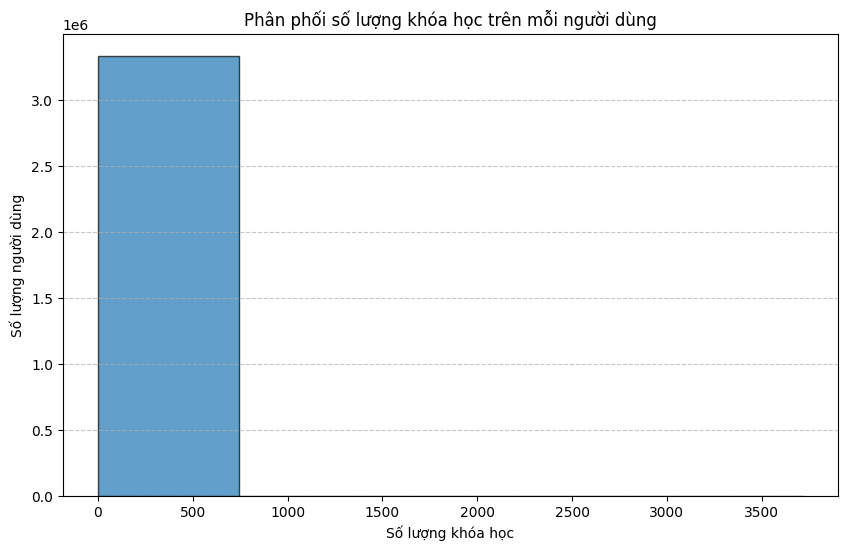

In [ ]:
# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist(df["number_of_courses"], bins=5, edgecolor="black", alpha=0.7)

# Thiết lập tiêu đề và nhãn trục
plt.xlabel("Số lượng khóa học")
plt.ylabel("Số lượng người dùng")
plt.title("Phân phối số lượng khóa học trên mỗi người dùng")
plt.grid(axis="y", linestyle="--", alpha=0.7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


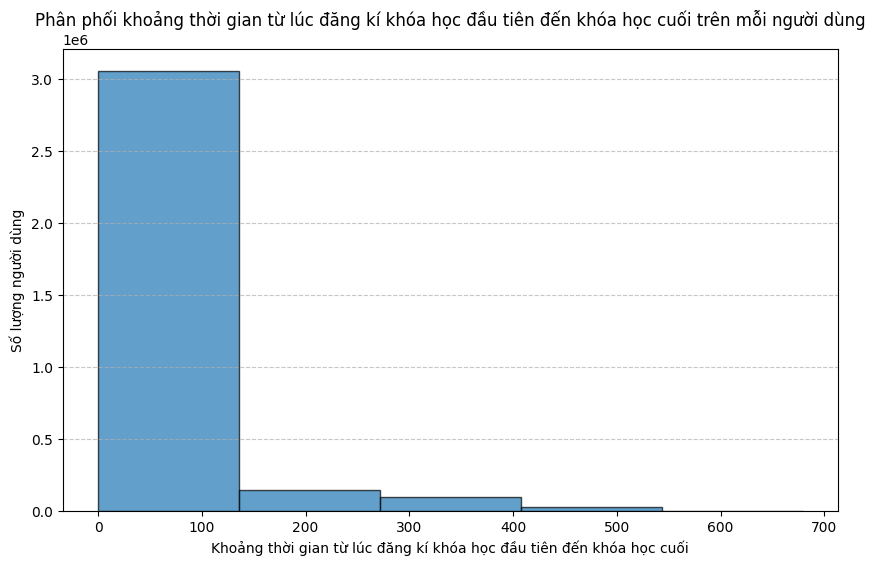

In [ ]:
# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist(df["enrollment_duration_days"], bins=5, edgecolor="black", alpha=0.7)

# Thiết lập tiêu đề và nhãn trục
plt.xlabel("Khoảng thời gian từ lúc đăng kí khóa học đầu tiên đến khóa học cuối")
plt.ylabel("Số lượng người dùng")
plt.title("Phân phối khoảng thời gian từ lúc đăng kí khóa học đầu tiên đến khóa học cuối trên mỗi người dùng")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


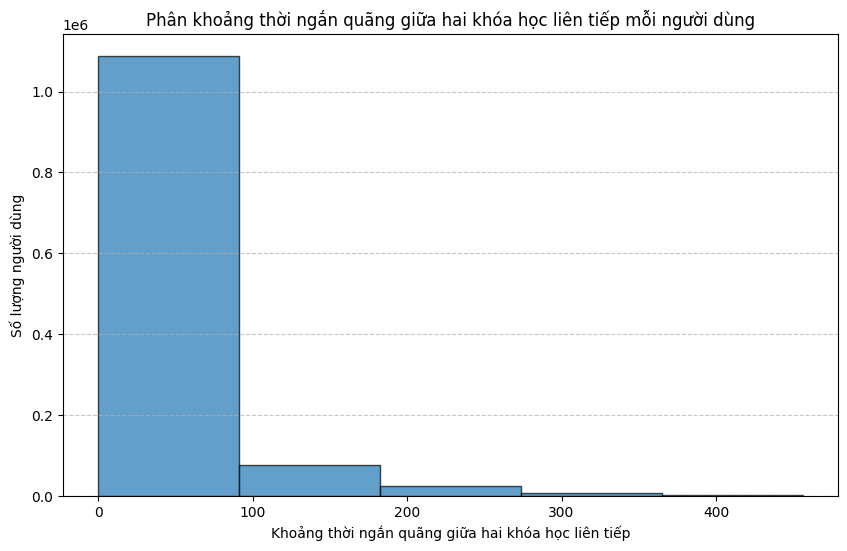

In [ ]:
# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist(df["avg_interval"], bins=5, edgecolor="black", alpha=0.7)

# Thiết lập tiêu đề và nhãn trục
plt.xlabel("Khoảng thời ngắn quãng giữa hai khóa học liên tiếp")
plt.ylabel("Số lượng người dùng")
plt.title("Phân khoảng thời ngắn quãng giữa hai khóa học liên tiếp mỗi người dùng")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()

#### 1.4 Xác định các giá trị ngoại lai (outlier)

In [ ]:
df = df.dropna(subset=["name"])
# Lọc các cột số
numerical_cols = df.select_dtypes(include=[np.number]).columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(numerical_cols)

Index(['gender', 'year_of_birth', 'number_of_courses', 'max_interval',
       'min_interval', 'avg_interval', 'year_start', 'avg_month_enroll',
       'enrollment_duration_days'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Sử dụng độ lệch chuẩn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Số lượng ngoại lai trong từng cột:
gender                          1
year_of_birth                 170
number_of_courses           77699
max_interval                13107
min_interval                26522
avg_interval                22009
year_start                      0
avg_month_enroll                0
enrollment_duration_days    96209
dtype: int64


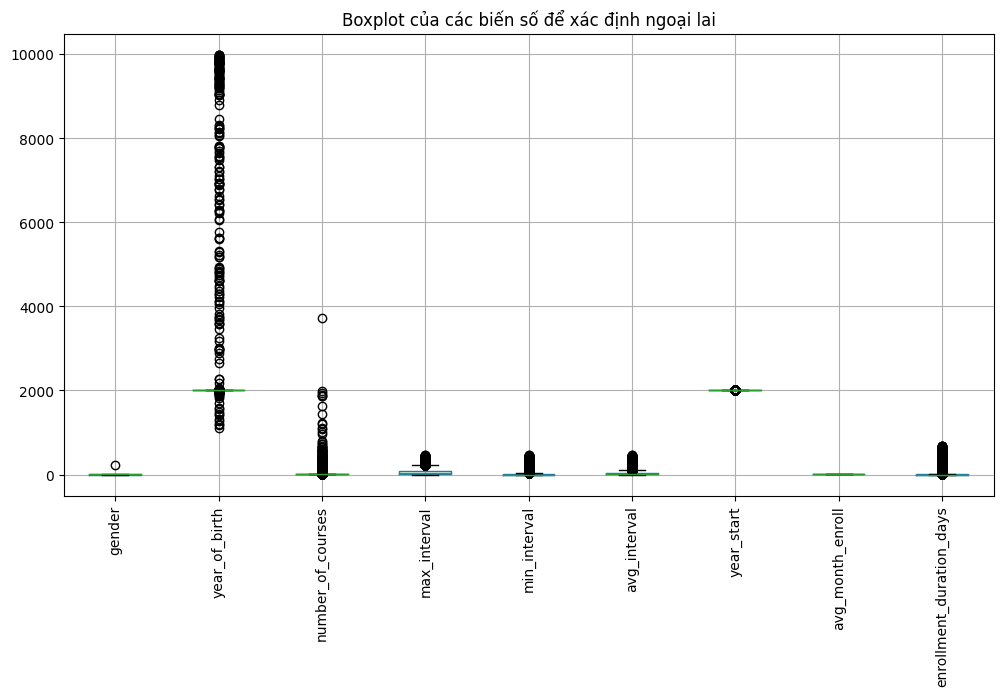

In [ ]:
# Tính mean, std, lower_bound, upper_bound bằng numpy để tối ưu hóa
mean_vals = df[numerical_cols].mean()
std_vals = df[numerical_cols].std()
lower_bounds = mean_vals - 3 * std_vals
upper_bounds = mean_vals + 3 * std_vals

# Xác định ngoại lai
outliers = (df[numerical_cols] < lower_bounds) | (df[numerical_cols] > upper_bounds)

# Thống kê số lượng ngoại lai trong từng cột
outlier_counts = outliers.sum()
print("Số lượng ngoại lai trong từng cột:")
print(outlier_counts)

# Vẽ boxplot để minh họa
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=90)  # Xoay nhãn trục x để dễ đọc
plt.title("Boxplot của các biến số để xác định ngoại lai")
plt.show()

##### Sử dụng z-score

In [ ]:
from scipy.stats import zscore

# Tính Z-score cho từng cột số
z_scores = df[numerical_cols].apply(zscore)

# Định nghĩa ngưỡng ngoại lai (thường là |Z| > 3)
threshold = 3
outliers = (np.abs(z_scores) > threshold)

# Thống kê số lượng ngoại lai trong từng cột
outlier_counts = outliers.sum()
print("Số lượng ngoại lai trong từng cột:")
print(outlier_counts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Số lượng ngoại lai trong từng cột:
gender                          1
year_of_birth                   0
number_of_courses           77699
max_interval                    0
min_interval                    0
avg_interval                    0
year_start                      0
avg_month_enroll                0
enrollment_duration_days    96209
dtype: int64


##### Sử dụng boxplot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


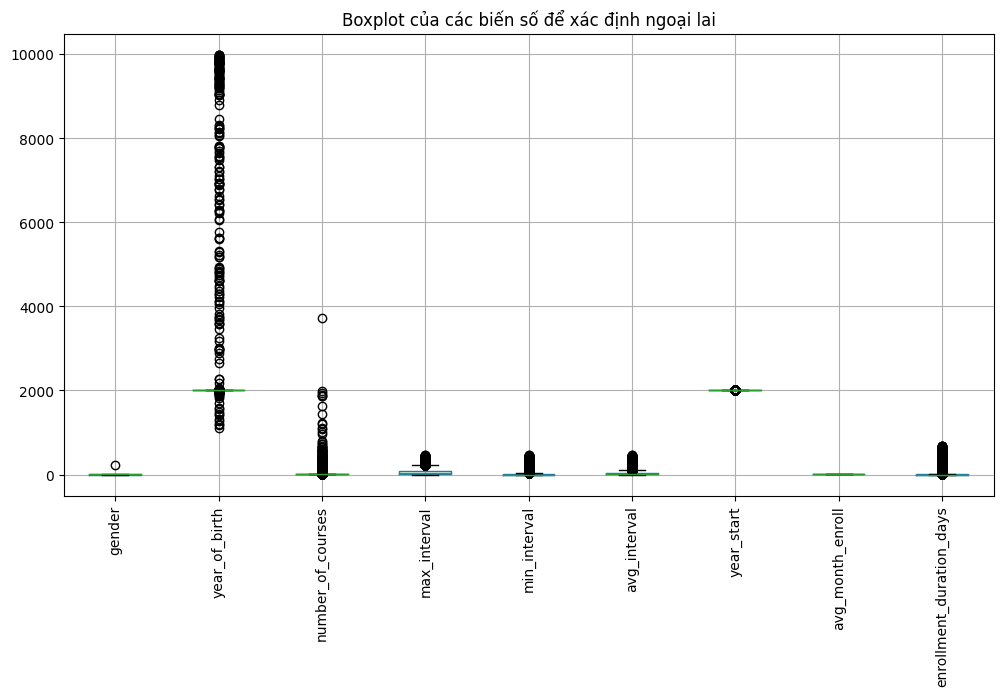

In [ ]:
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=90)  # Xoay nhãn trục x để dễ đọc
plt.title("Boxplot của các biến số để xác định ngoại lai")
plt.show()

### 2. Trực quan hóa dữ liệu

#### 2.1 Trực quan các số liệu thống kê

##### Số lượng gender

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated an

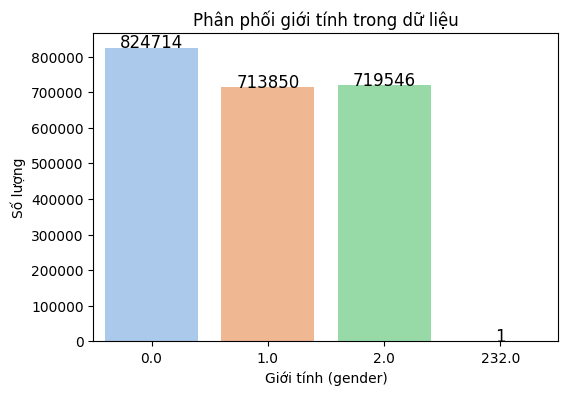

In [ ]:
# Đếm số lượng từng loại gender
gender_counts = df["gender"].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

# Thêm tiêu đề và nhãn trục
plt.xlabel("Giới tính (gender)")
plt.ylabel("Số lượng")
plt.title("Phân phối giới tính trong dữ liệu")
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct=lambda p: '{:.1f}%\n({:,.0f})'.format(p, p * sum(gender_counts) / 100),
    colors=["#ff9999", "#66b3ff", "#99ff99"],
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
# Hiển thị số lượng trên cột
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 1, str(v), ha="center", fontsize=12)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


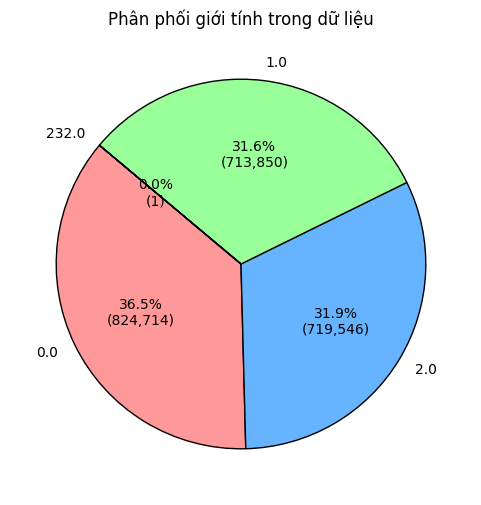

In [ ]:
import matplotlib.pyplot as plt

# Đếm số lượng từng loại gender
gender_counts = df["gender"].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct=lambda p: '{:.1f}%\n({:,.0f})'.format(p, p * sum(gender_counts) / 100),
    colors=["#ff9999", "#66b3ff", "#99ff99"],
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Thêm tiêu đề
plt.title("Phân phối giới tính trong dữ liệu")
plt.show()

- Giới tính 0 chiếm tỷ lệ cao nhất trong dữ liệu với 36.5%, cao hơn so với các giới tính khác. Tuy nhiên, sự chênh lệch giữa các nhóm không quá lớn (36.5% cho giới tính 0, 31.6% cho giới tính 1, và 31.9% cho giới tính 2).
- Do đó, dữ liệu có sự phân bố khá đồng đều, giúp giảm nguy cơ mất cân bằng và hạn chế hiện tượng bias trong quá trình huấn luyện mô hình.


#####  Số lượng học sinh đăng kí khóa học mỗi năm

In [ ]:
# Đếm số lần xuất hiện của từng năm
year_enroll_counts = df['year_enroll'].explode().value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(year_enroll_counts)

year_enroll
2019    1373036
2020    7582330
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


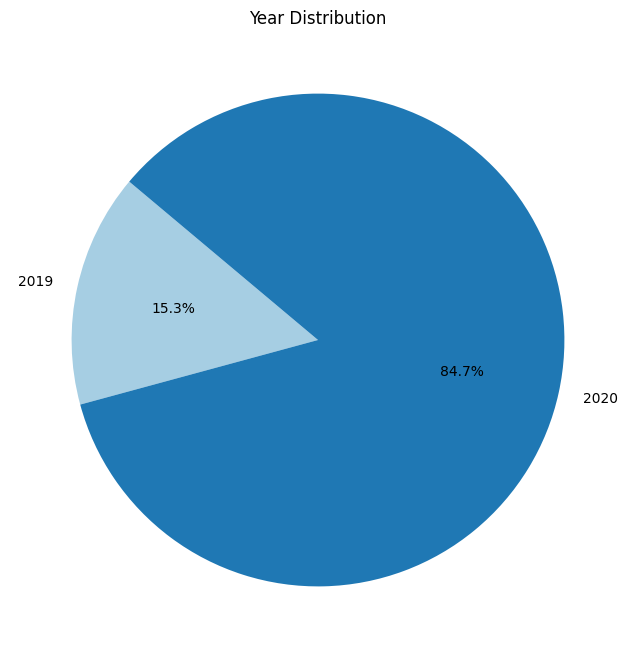

In [ ]:
# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_enroll_counts, labels=year_enroll_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Year Distribution')
plt.show()


- Năm 2019, chỉ có 12,2% học sinh tham gia khóa học.
- Năm 2020, tỷ lệ học sinh tham gia tăng lên 87,8%, tức là lớn gấp khoảng 7,2 lần so với năm 2019.
- Điều này cho thấy sự gia tăng mạnh mẽ về số lượng học sinh đăng ký khóa học trong năm 2020.
- Cũng cho thấy mất cân bằng khá lớn về dữ liệu, khó huấn luyện mô hình theo thời gian vì dữ liệu không có sự đa dạng cho các năm.


##### Phần trăm học sinh đăng kí trong các buổi trong ngày

In [ ]:
# Chuyển đổi từ chuỗi thành danh sách thực sự
df["time_of_day"] = df["time_of_day"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Đếm số lần xuất hiện của từng thời điểm trong ngày
time_of_day_counts = df["time_of_day"].explode().value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
time_of_day_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time_of_day
afternoon    3440630
morning      2422788
night        3091948
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


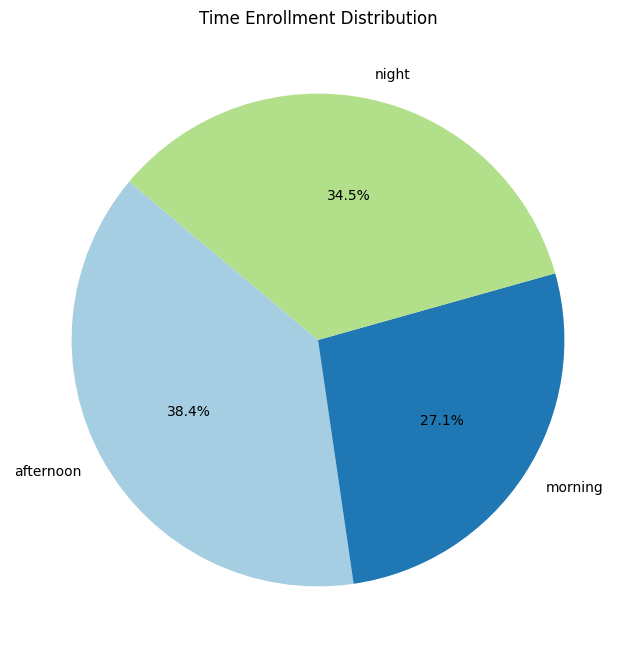

In [ ]:
time_of_day_counts = df['time_of_day'].explode().value_counts().sort_index()

# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Time Enrollment Distribution')
plt.show()

- Buổi chiều (38.4%) và buổi tối (34.5%) có tỷ lệ học sinh đăng ký khóa học gần như ngang nhau, cho thấy đây là khoảng thời gian phổ biến để đăng ký.
- Buổi sáng (27.1%) có tỷ lệ đăng ký thấp hơn đáng kể so với buổi chiều và buổi tối.




##### Phần trăm đăng kí khóa học theo tháng

In [ ]:
# Chuyển đổi từ chuỗi thành danh sách thực sự
df["month_enroll"] = df["month_enroll"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
month_enroll_counts = df['month_enroll'].explode().value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
month_enroll_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


month_enroll
1      313879
2     2002687
3      841283
4      464915
5      767929
6      518778
7      617521
8      551399
9      462042
10     858768
11     843222
12     712943
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


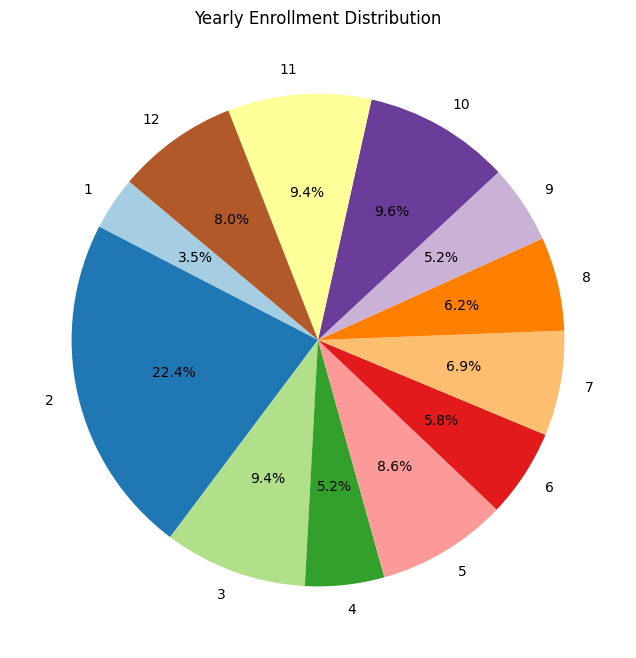

In [ ]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(month_enroll_counts, labels=month_enroll_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Yearly Enrollment Distribution')
plt.show()

- Tháng 2, 3 và 11, 10 là những tháng có nhiều học sinh đăng ký nhất, với tỷ lệ lần lượt là 22,4%, 9,4%, và 9,4%, 9,6%. Điều này cho thấy có thể có các chương trình ưu đãi hoặc nhu cầu học tăng cao trong các tháng này.
- Tháng 1 có số lượng học sinh đăng ký mới thấp nhất, chỉ 3,2%, có thể do thời điểm này rơi vào dịp nghỉ lễ hoặc chưa phải là giai đoạn cao điểm để bắt đầu khóa học.
- Các tháng còn lại có tỷ lệ đăng ký dao động trong khoảng 5-8%, phản ánh mức độ ổn định của số lượng học viên đăng ký trong phần lớn thời gian trong năm.
- Xu hướng đăng ký cao vào tháng 2 và 3 có thể liên quan đến nhu cầu học tập đầu năm, trong khi tháng 10, 11 có thể là thời điểm học sinh chuẩn bị cho các kỳ thi hoặc các chương trình đào tạo cuối năm.


#### 2.2 Mối quan hệ giữa các biến

##### Số lượng course cho mỗi học sinh

In [ ]:
# Chuyển Series thành DataFrame để sắp xếp
course_counts = df["number_of_courses"].value_counts().reset_index()
course_counts.columns = ["number_of_courses", "count"]  # Đặt lại tên cột

# Sắp xếp theo num_course (từ nhỏ đến lớn)
course_counts = course_counts.sort_values("number_of_courses")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
course_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,number_of_courses,count
0,1,1442615
1,2,351571
2,3,136501
3,4,68550
4,5,41694
...,...,...
288,1862,1
307,1887,1
359,1945,1
363,1976,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


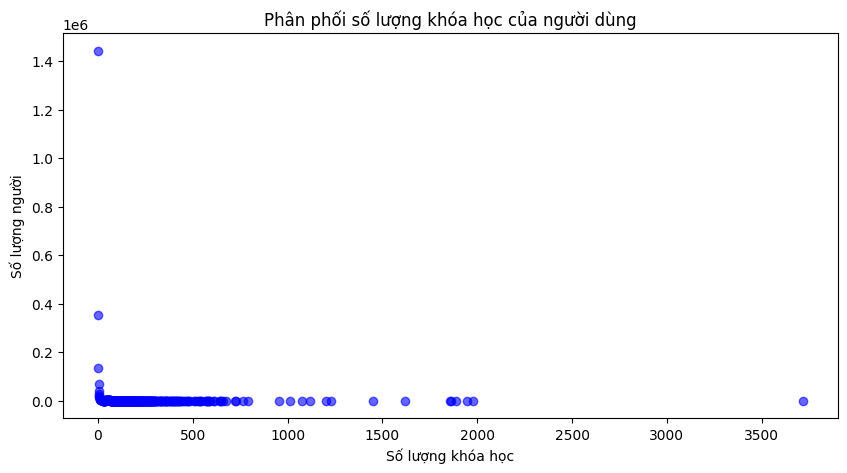

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
# Vẽ scatter plot
plt.scatter(course_counts["number_of_courses"], course_counts["count"], color="b", alpha=0.6)

# Thêm tiêu đề và nhãn
plt.xlabel("Số lượng khóa học")
plt.ylabel("Số lượng người")
plt.title("Phân phối số lượng khóa học của người dùng")
plt.xticks(rotation=0)  # Giữ nhãn trục X thẳng đứng
plt.show()

Giới hạn số lượng khóa học để nhìn rõ hơn về dữ liệu và xu hướng

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


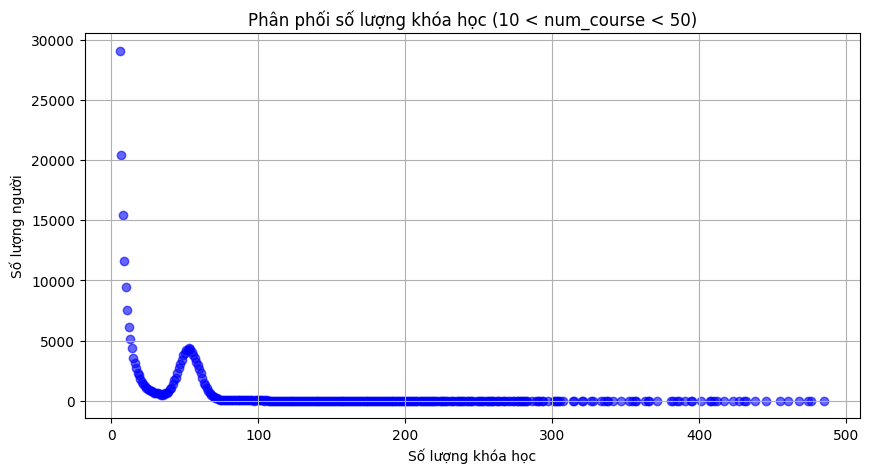

In [ ]:
# Lọc dữ liệu có số lượng khóa học từ 10 đến dưới 50
filtered_course_counts = course_counts[(course_counts["number_of_courses"] > 5) & (course_counts["number_of_courses"] < 500)]

# Kiểm tra nếu có dữ liệu để vẽ
if not filtered_course_counts.empty:
    plt.figure(figsize=(10, 5))
    # Vẽ scatter plot
    plt.scatter(filtered_course_counts["number_of_courses"], filtered_course_counts["count"], color="b", alpha=0.6)

    # Thêm tiêu đề và nhãn
    plt.xlabel("Số lượng khóa học")
    plt.ylabel("Số lượng người")
    plt.title("Phân phối số lượng khóa học (10 < num_course < 50)")
    plt.grid(True)

    plt.show()
else:
    print("Không có người nào có số lượng khóa học từ 10 đến dưới 50.")

1. Xu hướng chung:
- Nếu đường biểu đồ có xu hướng giảm dần, điều đó cho thấy số lượng người học nhiều khóa học ít đi, nghĩa là hầu hết người dùng chỉ đăng ký một số ít khóa học.
- Nếu đường biểu đồ có nhiều dao động, có thể có một số lượng khóa học nhất định thu hút nhiều người đăng ký hơn hẳn so với các khóa học khác.
2. Sự phân bố số lượng khóa học đã đăng ký:
- Nếu ở đầu biểu đồ có giá trị cao và sau đó giảm dần, điều này gợi ý rằng đa số người học chỉ đăng ký ít khóa học.
- Nếu biểu đồ xuất hiện nhiều đỉnh cao tại một số điểm cụ thể (ví dụ: 5, 10, 20 khóa học), có thể một số lượng khóa học nhất định có sức hút mạnh mẽ, khiến nhiều người đăng ký hơn.
3. Ngưỡng 500 khóa học:
- Biểu đồ giúp tập trung phân tích vào nhóm người học có số lượng đăng ký hợp lý.
- Đường biểu đồ giảm mạnh khi số khóa học tăng, có thể kết luận rằng đa số người học đăng ký dưới 500 khóa học, và số người học đăng ký nhiều khóa học giảm dần theo số lượng khóa học.


##### Mối quan hệ giữa giới tính và số lượng khóa học

In [ ]:
# Tính tổng số khóa học của từng giới tính
gender_course_sum = df.groupby("gender")["number_of_courses"].sum()

# Hiển thị kết quả
print(gender_course_sum)

gender
0.0      5494164
1.0      1857417
2.0      1603784
232.0          1
Name: number_of_courses, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated an

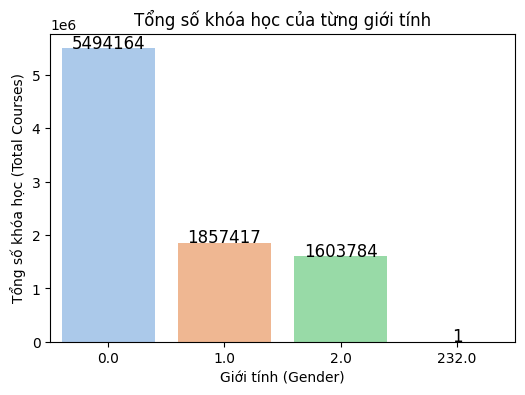

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_course_sum.index, y=gender_course_sum.values, palette="pastel")

# Thêm tiêu đề và nhãn trục
plt.xlabel("Giới tính (Gender)")
plt.ylabel("Tổng số khóa học (Total Courses)")
plt.title("Tổng số khóa học của từng giới tính")

# Hiển thị số lượng trên cột
for i, v in enumerate(gender_course_sum.values):
    plt.text(i, v + 1, str(v), ha="center", fontsize=12)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


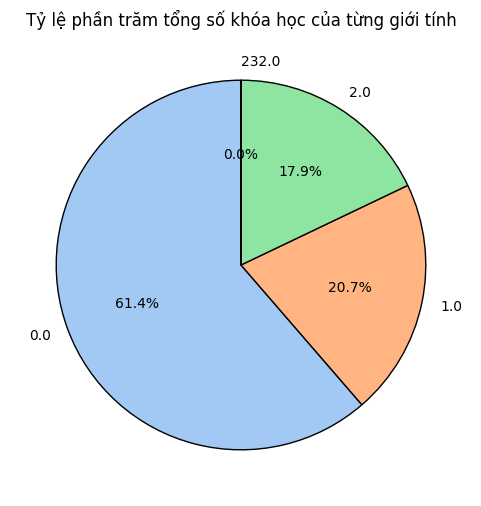

In [ ]:
# Tính phần trăm tổng số khóa học
total_courses = gender_course_sum.sum()
gender_course_percent = (gender_course_sum / total_courses) * 100

# Vẽ biểu đồ tròn (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    gender_course_percent,
    labels=gender_course_percent.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

# Thêm tiêu đề
plt.title("Tỷ lệ phần trăm tổng số khóa học của từng giới tính")

# Hiển thị biểu đồ
plt.show()

- Tuy phân trong phối dữ liệu phần trăm giới tính 0, 1, 2 không có sự chênh lệnh nhiều (36,5% cho 0, 31.6% cho cho 1 và 31.9% cho 2) nhưng tổng khóa học được đăng kí bởi những người có giới tính 0 là nhiều nhất. Điều này có thể do outliers chưa được loại bỏ
- Phần trăm số lượng khóa học của giới tính 2 là 17,9% và 1 là 20,7%.



In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/forma

,id,name,gender,school,year_of_birth,course_order,enroll_time,number_of_courses,year_enroll,month_enroll,...,max_interval,min_interval,avg_interval,time_of_day,year_start,avg_month_enroll,first_enroll,latest_enroll,enrollment_duration_days,enroll_date
0,U_22,我,0.0,NaN,2015.0,"[682129, 2294668]","['2019-10-12 10:28:02', '2020-11-21 14:03:28']",2,"[2019, 2020]","[10, 11]",...,406.0,406.0,406.00,"[morning, afternoon]",2019.0,10.50,2019-10-12,2020-11-21,406,"[2019-10, 2020-11]"
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","['2019-05-20 16:06:48', '2019-05-24 19:34:43',...",65,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[5, 5, 6, 6, 6, 8, 8, 8, 9, 10, 10, 10, 10, 10...",...,65.0,0.0,8.61,"[afternoon, night, night, afternoon, afternoon...",2019.0,6.38,2019-05-20,2020-11-21,551,"[2019-05, 2019-05, 2019-06, 2019-06, 2019-06, ..."
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],['2020-08-07 18:59:13'],1,[2020],[8],...,NaN,NaN,NaN,[night],2020.0,8.00,2020-08-07,2020-08-07,0,[2020-08]
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","['2020-03-01 21:24:30', '2020-03-12 16:17:02',...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[3, 3, 3, 3, 4, 4, 6, 6]",...,39.0,5.0,15.57,"[night, afternoon, morning, night, morning, af...",2020.0,4.00,2020-03-01,2020-06-18,109,"[2020-03, 2020-03, 2020-03, 2020-03, 2020-04, ..."
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","['2019-10-09 02:17:49', '2019-11-08 00:49:03',...",9,"[2019, 2019, 2020, 2020, 2020, 2020, 2020, 202...","[10, 11, 4, 5, 6, 6, 6, 6, 7]",...,159.0,0.0,35.62,"[night, night, morning, night, night, afternoo...",2019.0,6.78,2019-10-09,2020-07-20,285,"[2019-10, 2019-11, 2020-04, 2020-05, 2020-06, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330170,U_34711822,杨文操,1.0,NaN,NaN,[1822804],['2020-10-12 00:09:21'],1,[2020],[10],...,NaN,NaN,NaN,[night],2020.0,10.00,2020-10-12,2020-10-12,0,[2020-10]
3330193,U_34711862,超,1.0,陕西师范大学,NaN,[936971],['2020-12-03 17:59:07'],1,[2020],[12],...,NaN,NaN,NaN,[afternoon],2020.0,12.00,2020-12-03,2020-12-03,0,[2020-12]
3330194,U_34711863,娅伦格日勒,2.0,NaN,NaN,"[948124, 936971]","['2020-10-12 08:13:11', '2020-11-30 12:21:23']",2,"[2020, 2020]","[10, 11]",...,49.0,49.0,49.00,"[morning, afternoon]",2020.0,10.50,2020-10-12,2020-11-30,49,"[2020-10, 2020-11]"
3330236,U_34711954,Deloray,2.0,NaN,NaN,"[696807, 697360, 696889, 1765604, 1761462, 735...","['2020-10-12 00:48:01', '2020-10-12 00:48:40',...",8,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]","[10, 10, 10, 10, 10, 10, 10, 10]",...,6.0,0.0,0.86,"[night, night, night, night, night, night, aft...",2020.0,10.00,2020-10-12,2020-10-18,6,"[2020-10, 2020-10, 2020-10, 2020-10, 2020-10, ..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated an

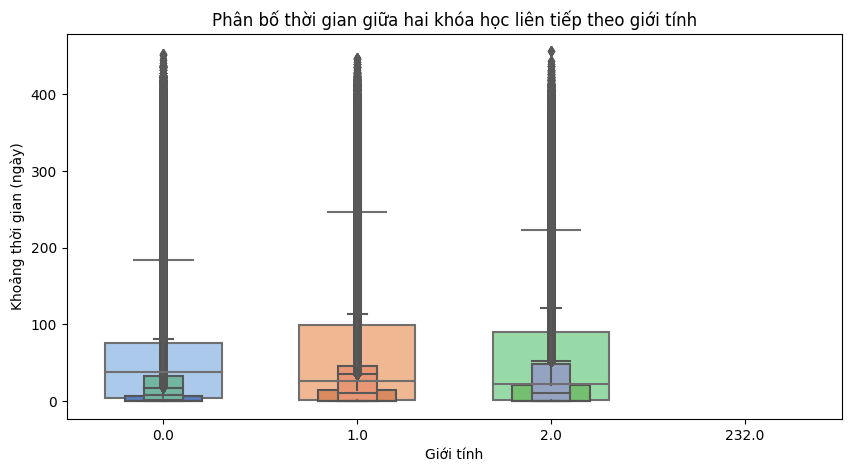

In [ ]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 5))

# Vẽ boxplot cho các khoảng thời gian
sns.boxplot(data=df, x="gender", y="max_interval", palette="pastel", width=0.6)
sns.boxplot(data=df, x="gender", y="min_interval", palette="muted", width=0.4)
sns.boxplot(data=df, x="gender", y="avg_interval", palette="Set2", width=0.2)

# Thiết lập tiêu đề
plt.title("Phân bố thời gian giữa hai khóa học liên tiếp theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Khoảng thời gian (ngày)")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated an

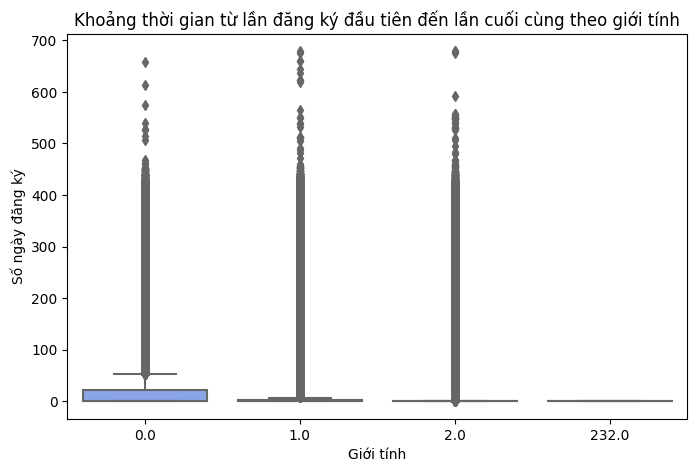

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="gender", y="enrollment_duration_days", palette="coolwarm")

plt.title("Khoảng thời gian từ lần đăng ký đầu tiên đến lần cuối cùng theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số ngày đăng ký")
plt.show()

In [ ]:
df = df.drop(df[df["gender"] == 232].index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


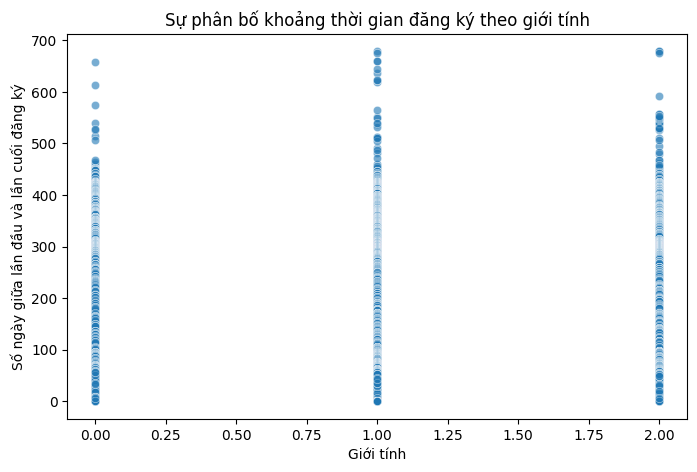

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="gender", y="enrollment_duration_days", alpha=0.6)

plt.title("Sự phân bố khoảng thời gian đăng ký theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số ngày giữa lần đầu và lần cuối đăng ký")
plt.show()

- Biểu đồ scatter cho thấy rằng một số người thuộc giới tính 1 có thời gian chờ lâu hơn trước khi đăng ký khóa học đầu tiên so với những người thuộc giới tính 0 và 2.
- Ngoài ra, nhóm giới tính 0 có xu hướng đăng ký khóa học đầu tiên chủ yếu trong khoảng 0 đến 490 ngày trước ngày hiện tại, cho thấy họ thường tham gia khóa học sớm hơn so với các nhóm giới tính khác.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


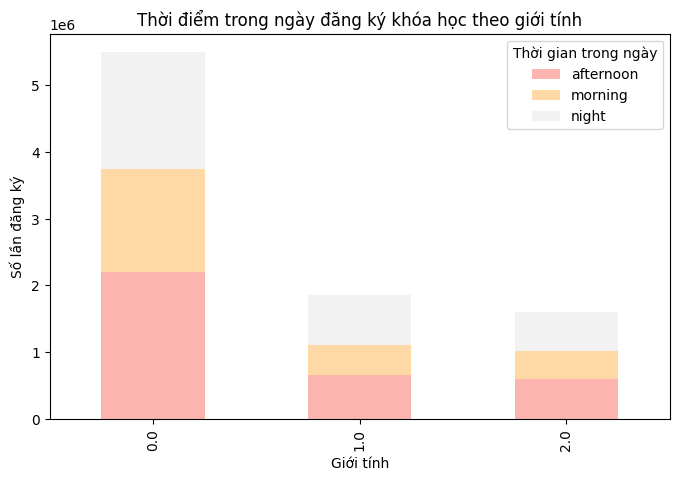

In [ ]:
# Chuyển danh sách time_of_day thành dạng list đơn giản
df_exploded = df.explode("time_of_day")

# Đếm số lượng từng thời điểm đăng ký theo gender
time_of_day_counts = df_exploded.groupby(["gender", "time_of_day"]).size().unstack()

# Vẽ biểu đồ bar stacked
time_of_day_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Pastel1")

plt.title("Thời điểm trong ngày đăng ký khóa học theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số lần đăng ký")
plt.legend(title="Thời gian trong ngày")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


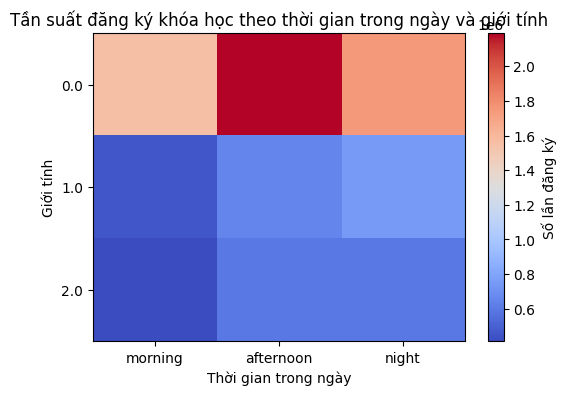

In [ ]:
# Định nghĩa thứ tự của các khung giờ trong ngày
time_of_day_order = ["morning", "afternoon", "night"]

# Đếm số lượng đăng ký theo gender và time_of_day
heatmap_data = df_exploded.groupby(["gender", "time_of_day"]).size().unstack().reindex(columns=time_of_day_order)

# Chuyển đổi dữ liệu về dạng numpy để vẽ imshow
plt.figure(figsize=(6, 4))
plt.imshow(heatmap_data, cmap="coolwarm", aspect="auto")

# Gắn nhãn trục
plt.xticks(range(len(time_of_day_order)), time_of_day_order)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.colorbar(label="Số lần đăng ký")
plt.title("Tần suất đăng ký khóa học theo thời gian trong ngày và giới tính")
plt.xlabel("Thời gian trong ngày")
plt.ylabel("Giới tính")
plt.show()

- Những người thuộc giới tính 0 có xu hướng đăng ký khóa học chủ yếu vào buổi chiều.
- Những người thuộc giới tính 1 thường đăng ký vào buổi tối.
Trong khi đó, những người thuộc giới tính 2 có thời gian đăng ký phân bố đều giữa ban ngày và ban đêm.


#### 2.3 Biễu diễn một số mẫu theo thời gian

##### Đồ thì số lượng học sinh đăng kí khóa học theo từng ngày

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


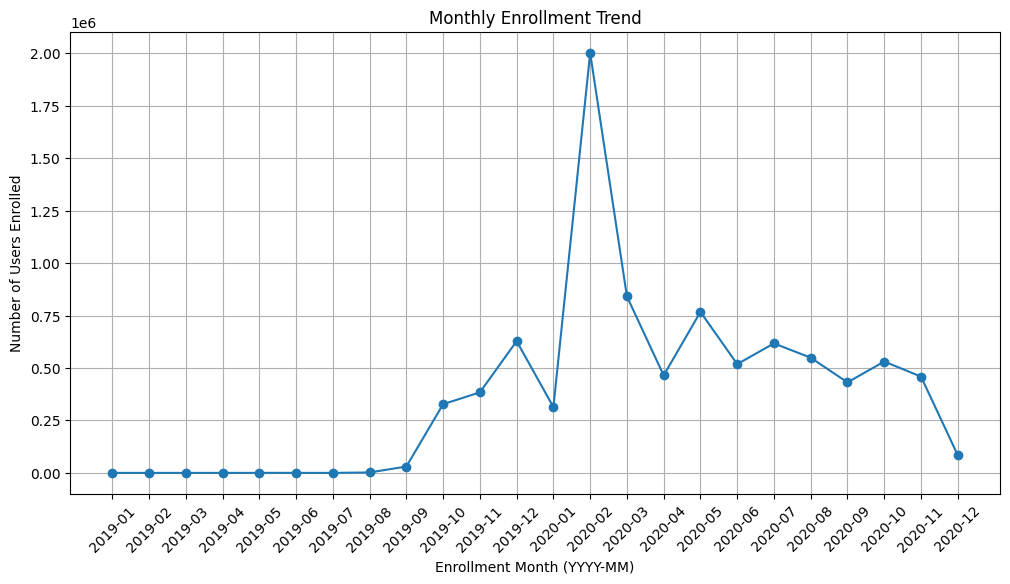

In [ ]:
df['enroll_date'] = df.apply(lambda row: [f"{y}-{m:02d}" for y, m in zip(row['year_enroll'], row['month_enroll'])], axis=1)
# Gán dữ liệu dates và số lượng user tham gia mỗi tháng
monthly_enroll_counts = pd.Series([date for dates in df['enroll_date'] for date in dates]).value_counts().sort_index()
# Vẽ chart timeline
plt.figure(figsize=(12, 6))
plt.plot(monthly_enroll_counts.index, monthly_enroll_counts.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Enrollment Month (YYYY-MM)")
plt.ylabel("Number of Users Enrolled")
plt.title("Monthly Enrollment Trend")
plt.grid(True)
plt.show()

- Tăng trưởng mạnh: Trong giai đoạn từ tháng 8/2019 đến 2/2020, số lượng học sinh đăng ký khóa học tăng đáng kể. Đặc biệt, tháng 1/2020 có mức tăng đột biến từ 0.4 lên gần 2.8 triệu học viên (1e6). Điều này có thể do nhu cầu học tập tăng cao sau kỳ nghỉ lễ hoặc do các chương trình khuyến mãi đầu năm của các nền tảng giáo dục.
- Giảm dần sau đỉnh cao: Từ tháng 4/2020 đến 11/2020, số lượng học sinh tham gia khóa học bắt đầu có xu hướng giảm, từ 1 triệu xuống còn khoảng 0.5 triệu. Sự suy giảm này có thể liên quan đến việc học sinh đã ổn định lịch trình học tập hoặc các yếu tố bên ngoài ảnh hưởng đến nhu cầu đăng ký khóa học.
- Giảm sâu về cuối năm: Cuối cùng, số lượng học viên tiếp tục giảm xuống khoảng 0.2 triệu, cho thấy sự suy giảm rõ rệt trong việc đăng ký khóa học. Điều này có thể phản ánh sự thay đổi trong xu hướng học tập, kết thúc các chương trình ưu đãi hoặc học sinh đã hoàn thành các khóa học cần thiết trước đó.


##### Biểu đồ biểu thị số lượng học sinh tham gia khóa học theo gender

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


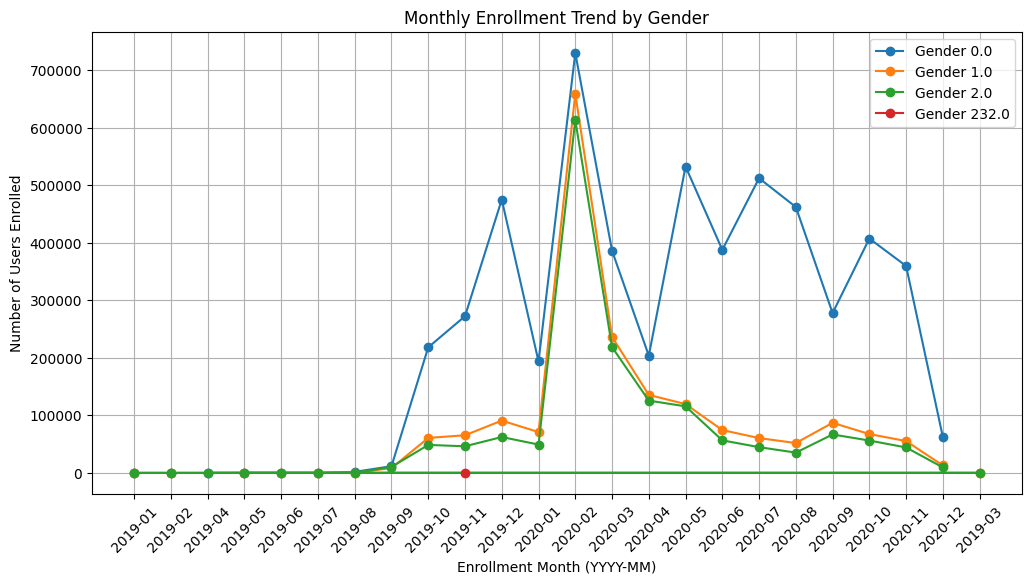

In [ ]:
# Khởi tạo từ điển gender_enroll_counts để lưu số lượng lượt đăng ký theo tháng cho từng giới tính.
gender_enroll_counts = {}
# Duyệt qua từng giới tính trong cột gender
for gender in df['gender'].unique():
    # Lọc các dòng có giới tính tương ứng.
    gender_df = df[df['gender'] == gender]

    # Làm phẳng danh sách ngày đăng ký (enroll_date) vì mỗi người dùng có thể đăng ký nhiều lần.
    enroll_dates = [date for dates in gender_df['enroll_date'] for date in dates]

    # Đếm số lần xuất hiện của mỗi tháng đăng ký.
    gender_enroll_counts[gender] = pd.Series(enroll_dates).value_counts().sort_index()
# Vẽ biểu đồ xu hướng đăng ký theo thời gian
plt.figure(figsize=(12, 6))
# Sử dụng plt.plot() để vẽ số lượng đăng ký theo tháng cho từng giới tính.
for gender, counts in gender_enroll_counts.items():
    plt.plot(counts.index, counts.values, marker='o', linestyle='-', label=f"Gender {gender}")
plt.xticks(rotation=45)
plt.xlabel("Enrollment Month (YYYY-MM)")
plt.ylabel("Number of Users Enrolled")
plt.title("Monthly Enrollment Trend by Gender")
plt.legend()
plt.grid(True)
plt.show()

- Tăng mạnh vào tháng 1: Tương tự như xu hướng tổng thể, số lượng học sinh thuộc cả ba nhóm giới tính (gender 0, gender 1, gender 2) đều tăng mạnh trong tháng 1. Điều này cho thấy không có sự khác biệt đáng kể giữa các giới tính trong giai đoạn này.
- Xu hướng tương tự giữa gender 1 và gender 2: Số lượng học sinh thuộc gender 1 và gender 2 có xu hướng biến động tương tự nhau theo thời gian, cho thấy có thể hai nhóm này có hành vi đăng ký khóa học giống nhau.
- Gender 0 ổn định hơn: Học sinh thuộc nhóm gender 0 có số lượng đăng ký ổn định hơn, không tăng hoặc giảm quá mạnh. Đặc biệt, trong hai giai đoạn từ 9/2019 đến 1/2020 và từ 3/2020 đến 12/2020, số lượng học sinh gender 0 thường cao hơn so với hai nhóm còn lại.
- Dữ liệu bị nhiễu: Xuất hiện một số giá trị bất thường trong cột giới tính, như gender 3 và gender 232, có thể là dữ liệu sai hoặc bị nhập lỗi. Những giá trị này cần được xử lý hoặc loại bỏ trong quá trình làm sạch dữ liệu để đảm bảo mô hình huấn luyện chính xác.


#### 2.4 Dashboard biểu diễn dữ liệu timeline

In [ ]:
# Tạo DataFrame mẫu (Thay thế bằng dữ liệu thực tế của bạn)
df['enroll_date'] = df.apply(lambda row: [f"{y}-{m:02d}" for y, m in zip(row['year_enroll'], row['month_enroll'])], axis=1)

#Đếm số lượng người dùng đăng ký theo tháng
monthly_enroll_counts = pd.Series([date for dates in df['enroll_date'] for date in dates]).value_counts().sort_index()
df_monthly = pd.DataFrame({'enroll_month': monthly_enroll_counts.index, 'num_users': monthly_enroll_counts.values})

#  Tạo biểu đồ đường với Plotly
fig = px.line(df_monthly, x='enroll_month', y='num_users',
              title="Xu hướng đăng ký theo tháng",
              markers=True, labels={'enroll_month': 'Tháng đăng ký (YYYY-MM)', 'num_users': 'Số lượng người dùng đăng ký'})

# Tạo ứng dụng Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(figure=fig)  # Hiển thị biểu đồ
])

if __name__ == '__main__':
    app.run_server(debug=True)


##### Giảm số lượng biến

In [ ]:
# Chỉ giữ lại các cột số trong DataFrame
df_num = df.select_dtypes(include=[np.number])

# Chuẩn hóa dữ liệu để đảm bảo phương pháp giảm chiều hoạt động tốt
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated a

In [ ]:
df_num.drop(columns=["year_of_birth"], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: "['year_of_birth'] not found in axis"

In [ ]:
df_num.dropna(inplace=True)
df_num

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,number_of_courses,max_interval,min_interval,avg_interval,year_start,avg_month_enroll,enrollment_duration_days
0,0.0,2,406.0,406.0,406.00,2019.0,10.50,406
1,1.0,65,65.0,0.0,8.61,2019.0,6.38,551
3,1.0,8,39.0,5.0,15.57,2020.0,4.00,109
4,2.0,9,159.0,0.0,35.62,2019.0,6.78,285
6,2.0,2,0.0,0.0,0.00,2020.0,1.00,0
...,...,...,...,...,...,...,...,...
3330060,1.0,7,26.0,0.0,7.33,2020.0,10.29,44
3330143,1.0,2,1.0,1.0,1.00,2020.0,10.00,1
3330194,2.0,2,49.0,49.0,49.00,2020.0,10.50,49
3330236,2.0,8,6.0,0.0,0.86,2020.0,10.00,6


In [ ]:
df_num.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(815496, 8)

In [ ]:
# Chuẩn hóa dữ liệu để đảm bảo phương pháp giảm chiều hoạt động tốt
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated a

In [ ]:
df_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.08614856, -0.39492327,  4.57918828, ..., -1.60573008,
         1.79707758,  2.27637817],
       [ 0.13288838,  3.05466996,  0.0700823 , ..., -1.60573008,
         0.41779188,  3.37229552],
       [ 0.13288838, -0.06639058, -0.2737205 , ...,  0.62276968,
        -0.37897996,  0.03163712],
       ...,
       [ 1.35192533, -0.39492327, -0.14148866, ...,  0.62276968,
         1.79707758, -0.42184592],
       [ 1.35192533, -0.06639058, -0.7100856 , ...,  0.62276968,
         1.62968854, -0.7468421 ],
       [-1.08614856, -0.34016783, -0.69686241, ...,  0.62276968,
         1.62968854, -0.73928405]])

##### Singular Value Decomposition (SVD)

In [ ]:
svd = TruncatedSVD(n_components=2)
df_svd = svd.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Principal Component Analysis (PCA)

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


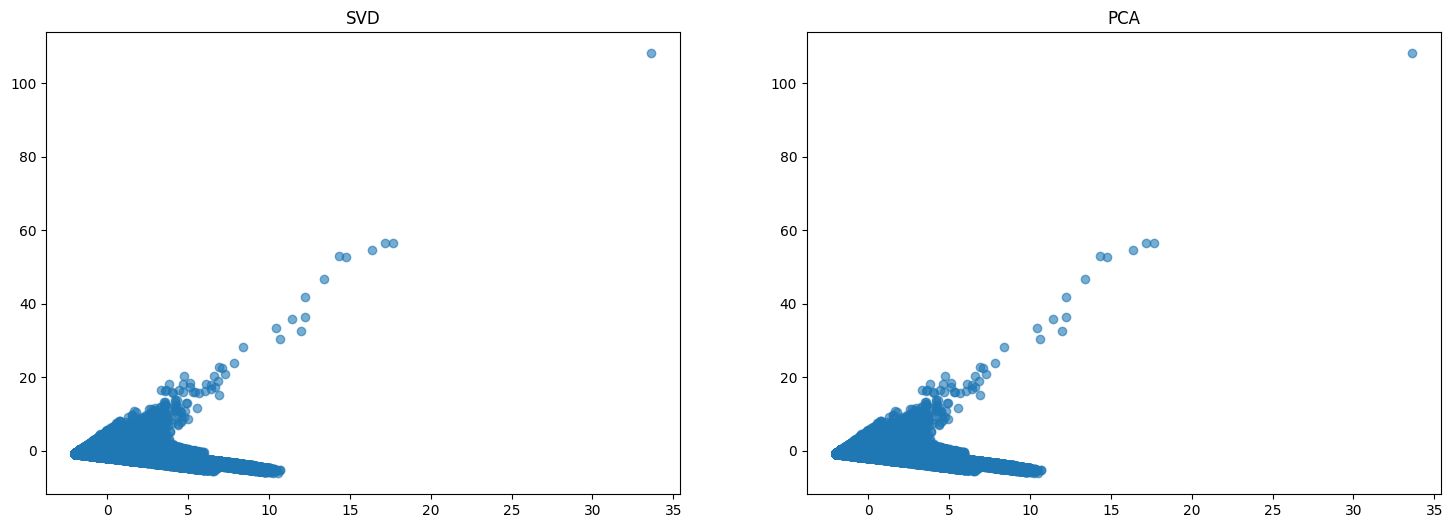

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# SVD
axes[0].scatter(df_svd[:, 0], df_svd[:, 1], alpha=0.6)
axes[0].set_title("SVD")

# PCA
axes[1].scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.6)
axes[1].set_title("PCA")

plt.show()

- SVD giữ lại tốt mối quan hệ tuyến tính giữa các biến nhưng không thực hiện tốt trên dữ liệu phi tuyến tính.
- PCA hiệu quả trong việc giữ lại phương sai, phù hợp khi dữ liệu có cấu trúc tuyến tính mạnh.
- t-SNE có thể giữ lại cấu trúc cục bộ của dữ liệu tốt hơn, đặc biệt hiệu quả khi dùng để trực quan hóa dữ liệu cao chiều.

Nhận xét kết quả
- Cả hai thuật toán giảm chiều đều cho kết quả tương tự nhau.
Phần lớn dữ liệu tập trung trong khoảng x từ -1 đến 10 và y từ -1 đến 20, với một số điểm nằm rải rác bên ngoài vùng này.
- Dữ liệu sau khi giảm chiều vẫn giữ được đặc điểm quan trọng của dữ liệu gốc, đặc biệt là sự phân bố tần suất cao ở các giá trị nhỏ.


##### n_component = 3

In [ ]:
svd = TruncatedSVD(n_components=3)
df_svd = svd.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


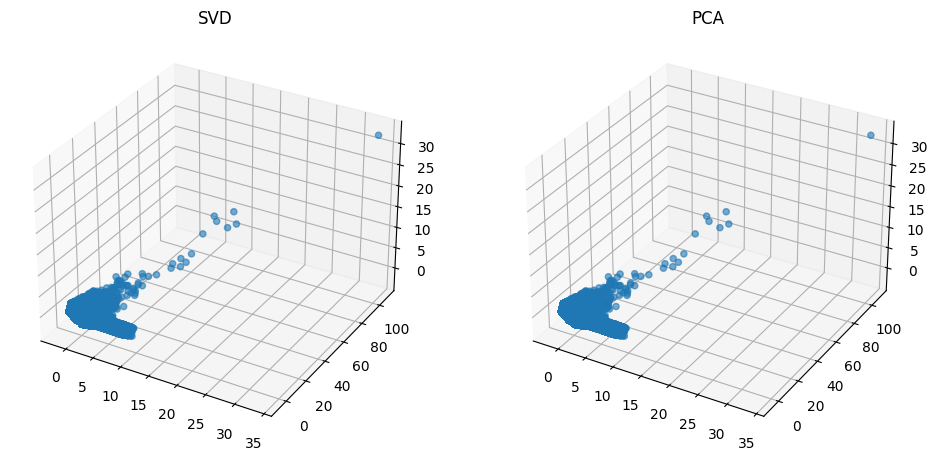

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 6))

# Danh sách các phương pháp
methods = {"SVD": df_svd, "PCA": df_pca}

for i, (name, data) in enumerate(methods.items()):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.6)
    ax.set_title(name)

plt.show()

Khi giữ lại 3 thành phần chính, tổng phương sai bảo toàn sẽ cao hơn so với n_components = 2, giúp giảm tổn thất thông tin.


## III. Xử lí dữ liệu


### Xử lí giá trị thiếu

In [ ]:
df.isnull().sum()

,0
problem_id,0
title,0
content,0
option,149564
answer,0
score,574372
type,0
typetext,0
location,0
context_id,0


In [ ]:
df_drop_na = df.dropna(subset=['option'], inplace=False)

df_drop_na = df_drop_na.dropna(subset=['score'], inplace=False)


In [ ]:
df_drop_na.isnull().sum()

,0
problem_id,0
title,0
content,0
option,0
answer,0
score,0
type,0
typetext,0
location,0
context_id,0


tôi sẽ bỏ đi các hàng không có option (những câu hỏi này không có câu trả lời, tức là chúng tôi sẽ không cần phải tìm cách điền dữ liệu giả vào để thay thế). Xử lí tương tự với score. Nên: Kết quả của df.isnull().sum() cho thấy không có giá trị thiếu (null) nào trong DataFrame. Mỗi cột đều có số lượng giá trị thiếu bằng 0, điều này có nghĩa là mọi cột đều có đầy đủ dữ liệu.



### Xử lí giá trị lặp



In [ ]:
df = df.duplicated(subset=["problem_id"])
df

,0
0,False
1,False
2,False
3,False
4,False
...,...
2454417,False
2454418,False
2454419,False
2454420,False


Từ đoạn output được xuất ra, ta thấy toàn bộ giá trị ở mỗi hàng đều là False nên trong Dataframe không chứa giá trị trùng lặp nào





### Xử lí giá trị nhiễu

#### Giá trị nhiễu dạng số

In [ ]:
# Chỉ lấy các cột score, type, và location
selected_columns = ['score', 'type']
df_selected = df_drop_na.loc[:, selected_columns]

df_selected.head()

,score,type
0,1.000000,1
1,1.000000,1
2,1.000000,1
3,1.000000,1
4,1.000000,1


In [ ]:
df_selected['type'].unique()

array([1, 6, 2, 3, 4])

In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)


In [ ]:
df_selected.describe()

,score,type
count,1763562.000000,1763562.000000
mean,1.337395,2.292066
std,1.246367,2.032705
min,0.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,2.000000
max,100.000000,6.000000


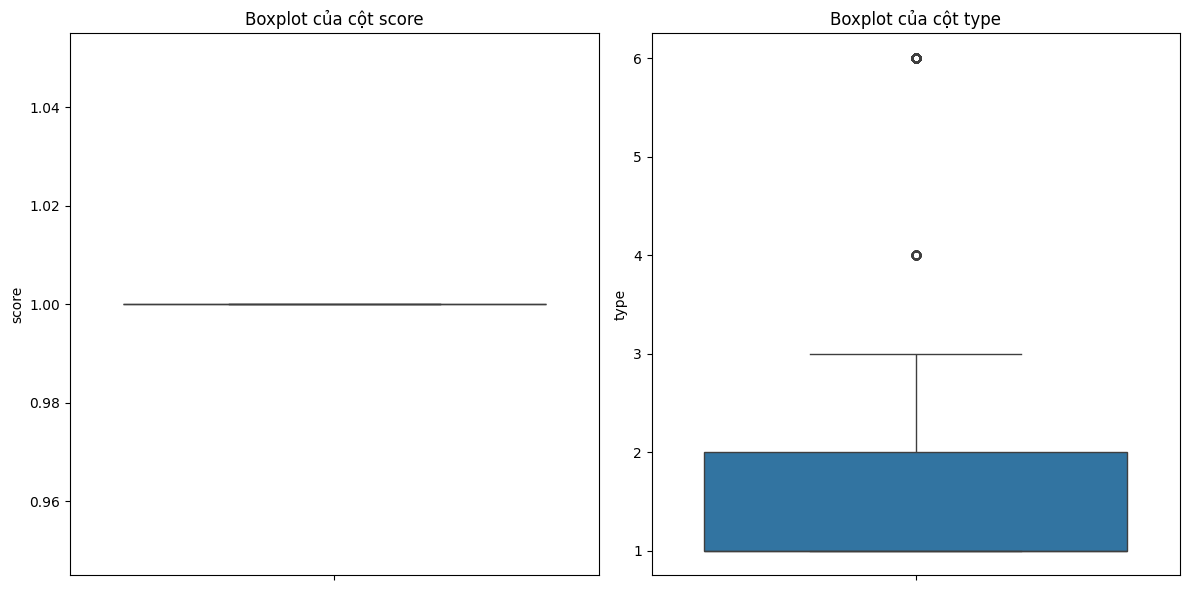

In [ ]:
# Tạo một figure với 2 subplot trên cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Biểu đồ boxplot cho cột 'score'
sns.boxplot(data=df_selected['score'], ax=axes[0])
axes[0].set_title('Boxplot của cột score')
# Biểu đồ boxplot cho cột 'type'
sns.boxplot(data=df_selected['type'], ax=axes[1])
axes[1].set_title('Boxplot của cột type')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Nhận xét: Với việc chưa xử lý dữ liệu ngoại lai nên ở cột "score" có giá trị max là 100.0, tương tự cột "type" có giá trị max là 9.0.


* boxplot cho cột 'score': Phân bố dữ liệu của cột "score" trong
DataFrame phân bố không đồng đều và chủ yếu tập trung vào một số giá trị cụ thể
 * Giá trị 1.0 chiếm phần lớn trong dữ liệu, với số lượng rất lớn, cho thấy một sự chênh lệch lớn so với các giá trị khác.
 * Giá trị 2.0, 3.0, 4.0, 5.0, 10.0, 17.0 cũng chiếm một phần nhỏ nhưng chưa đáng kể.
 * Các giá trị khác chỉ chiếm một tỷ lệ nhỏ trong dữ liệu.

=> Điều này cho thấy rằng cột "score" có một phân bố mất cân bằng, với một số giá trị xuất hiện rất ít so với giá trị khác.

* boxplot cho cột 'type': Phân bố dữ liệu của cột "type" trong DataFrame phân bố không đồng đều và chủ yếu tập trung vào một số giá trị cụ thể
 * Giá trị 1.0 và 2.0 xuất hiện nhiều nhất và phân bố đồng đều.
 * Giá trị 3.0, 4.0, 5.0, 6.0 cũng chiếm một phần nhỏ nhưng chưa đáng kể.
 * Các giá trị khác chỉ chiếm một tỷ lệ nhỏ trong dữ liệu.

=> Điều này cho thấy rằng cột "type" cũng bị mất cân bằng, với một số giá trị xuất hiện rất ít so với giá trị khác.

Interquartile Range:
Ngoại lai được xác định khi giá trị nằm ngoài khoảng [Q1 - 1.5* IQR, Q3 + 1.5* IQR], trong đó:
Q1 là giá trị tứ phân vị thứ nhất (25%).
Q3 là giá trị tứ phân vị thứ ba (75%).
IQR là hiệu số giữa Q3 và Q1.
Q1 là giá trị mà 25% các điểm dữ liệu nằm dưới nó,



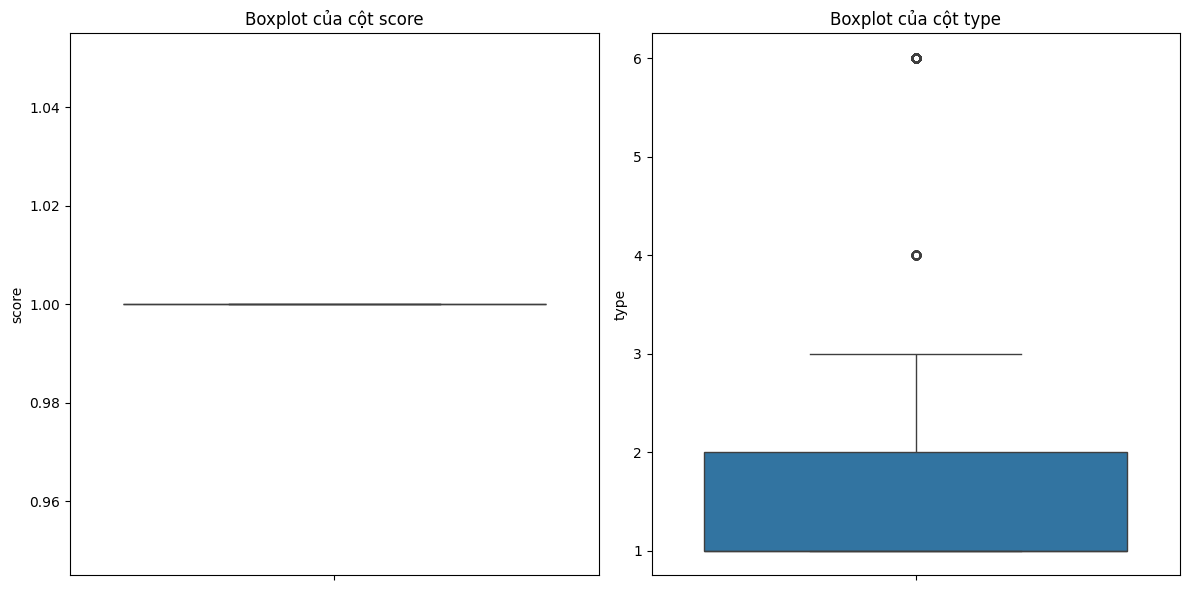

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Copy df_selected cho việc xử lí giá trị ngoại lai
df_selected_no_outliers = df_selected.copy()
# Hàm xác định và thay thế giá trị ngoại lai bằng giá trị trung vị
def replace_outliers_with_median(df, column):
    # Tính toán Q1, Q3 và IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Xác định giới hạn dưới và trên
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Tính giá trị trung vị của cột
    median_value = df[column].median()

    # Thay thế các giá trị ngoại lai bằng giá trị trung vị
    df[column] = np.where((df[column] < lower_limit) | (df[column] > upper_limit), median_value, df[column])

# Hàm xử lý ngoại lai và làm tròn số thập phân cho cột 'type'
def handle_outliers_and_round(df, column):
    # Kiểm tra nếu cột có giá trị thập phân và làm tròn
    df[column] = df[column].apply(lambda x: round(x) if isinstance(x, (float, np.float64)) else x)

# Xử lý ngoại lai cho cột 'score' (thay thế bằng giá trị trung vị)
replace_outliers_with_median(df_selected_no_outliers, 'score')

# Xử lý ngoại lai và làm tròn số thập phân cho cột 'type'
handle_outliers_and_round(df_selected_no_outliers, 'type')

# Tạo một figure với 2 subplot trên cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ boxplot cho cột 'score'
sns.boxplot(data=df_selected_no_outliers['score'], ax=axes[0])
axes[0].set_title('Boxplot của cột score')

# Biểu đồ boxplot cho cột 'type'
sns.boxplot(data=df_selected_no_outliers['type'], ax=axes[1])
axes[1].set_title('Boxplot của cột type')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Sau khi xử lí, boxplot đã không còn giá trị nhiễu, chúng được thay thế bằng các trung bình


In [ ]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo một StandardScaler
scaler = StandardScaler()

# Fit và chuyển đổi dữ liệu
df_scaled = scaler.fit_transform(df_selected)

# Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)

# In ra một số dòng đầu của DataFrame đã chuẩn hóa
df_scaled.head()

,score,type
0,-0.270703,-0.635639
1,-0.270703,-0.635639
2,-0.270703,-0.635639
3,-0.270703,-0.635639
4,-0.270703,-0.635639


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Khởi tạo một MaxAbsScaler
scaler = MaxAbsScaler()

# Fit và chuyển đổi dữ liệu
df_maxabs_scaled = scaler.fit_transform(df_selected)

# Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
df_maxabs_scaled = pd.DataFrame(df_maxabs_scaled, columns=df_selected.columns)

# In ra một số dòng đầu của DataFrame đã chuẩn hóa
df_maxabs_scaled.head()


,score,type
0,0.010000,0.166667
1,0.010000,0.166667
2,0.010000,0.166667
3,0.010000,0.166667
4,0.010000,0.166667


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo một MinMaxScaler
scaler = MinMaxScaler()

# Fit và chuyển đổi dữ liệu
df_minmax_scaled = scaler.fit_transform(df_selected)

# Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=df_selected.columns)

# In ra một số dòng đầu của DataFrame đã chuẩn hóa
df_minmax_scaled.head()


,score,type
0,0.010000,0.000000
1,0.010000,0.000000
2,0.010000,0.000000
3,0.010000,0.000000
4,0.010000,0.000000


In [ ]:
from sklearn.preprocessing import Normalizer

# Khởi tạo một Normalizer
scaler = Normalizer()

# Fit và chuyển đổi dữ liệu
df_normalized = scaler.fit_transform(df_selected)

# Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
df_normalized = pd.DataFrame(df_normalized, columns=df_selected.columns)

# In ra một số dòng đầu của DataFrame đã chuẩn hóa
df_normalized.head()


,score,type
0,0.707107,0.707107
1,0.707107,0.707107
2,0.707107,0.707107
3,0.707107,0.707107
4,0.707107,0.707107


In [ ]:
from sklearn.preprocessing import RobustScaler

# Khởi tạo một RobustScaler
scaler = RobustScaler()

# Fit và chuyển đổi dữ liệu
df_robust_scaled = scaler.fit_transform(df_selected)

# Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=df_selected.columns)

# In ra một số dòng đầu của DataFrame đã chuẩn hóa
df_robust_scaled.head()


,score,type
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000


### Giá trị không nhất quán

In [ ]:
df_selected.dtypes

,0
score,float64
type,int64


In [ ]:
# Kiểm tra kiểu dữ liệu của cột 'score'
print("Kiểu dữ liệu của cột 'score':", df_selected['score'].dtype)

# Kiểm tra các giá trị duy nhất trong cột 'score'
print("Các giá trị duy nhất trong cột 'score':", df_selected['score'].unique())
a
# Kiểm tra các giá trị âm
invalid_scores = df_selected[df_selected['score'] < 0]
print("Các giá trị không hợp lệ trong cột 'score':", invalid_scores)

Kiểu dữ liệu của cột 'score': float64
Các giá trị duy nhất trong cột 'score': [  1.    2.    5.    1.5  10.    4.    6.    3.    0.5  35.   30.   20.
  15.   25.    7.    8.   50.   40.   60.  100.    5.5   3.5   0.    9.
  11.    2.5  12.5  12.    4.5   0.8   0.2   0.3  33.   34.   80.   16.
  11.5  17. ]
Các giá trị không hợp lệ trong cột 'score': Empty DataFrame
Columns: [score, type]
Index: []


In [ ]:
# Kiểm tra kiểu dữ liệu của cột 'type'
print("Kiểu dữ liệu của cột 'type':", df_selected['type'].dtype)

# Kiểm tra các giá trị duy nhất trong cột 'type'
print("Các giá trị duy nhất trong cột 'type':", df_selected['type'].unique())

# Kiểm tra các giá trị không hợp lệ
invalid_type = df_selected[~df_selected['type'].isin([1,2,3,4,5,6,9])]
print("Các giá trị không hợp lệ trong cột 'score':", invalid_scores)

Kiểu dữ liệu của cột 'type': int64
Các giá trị duy nhất trong cột 'type': [1 6 2 3 4]
Các giá trị không hợp lệ trong cột 'score': Empty DataFrame
Columns: [score, type]
Index: []


In [ ]:
reference_table = df_drop_na[['type','typetext']].drop_duplicates()

# reference_table.head()

merged_df = df_drop_na[['type']].drop_duplicates().merge(reference_table, on='type',how='left')

merged_df = merged_df.sort_values(by='type')
for index, row in merged_df.iterrows():
  print(f"The value '{row['type']}' in the 'type' column corresponds to '{row['typetext']}'.")

type_to_typetext = dict(zip(merged_df['type'],merged_df['typetext']))

print(type_to_typetext)

The value '1' in the 'type' column corresponds to '单选题'.
The value '1' in the 'type' column corresponds to '填空题'.
The value '2' in the 'type' column corresponds to '多选题'.
The value '2' in the 'type' column corresponds to '单选题'.
The value '3' in the 'type' column corresponds to '投票题'.
The value '4' in the 'type' column corresponds to '填空题'.
The value '4' in the 'type' column corresponds to '判断题'.
The value '6' in the 'type' column corresponds to '判断题'.
The value '6' in the 'type' column corresponds to '单选题'.
The value '6' in the 'type' column corresponds to '填空题'.
{1: '填空题', 2: '单选题', 3: '投票题', 4: '判断题', 6: '填空题'}


In [ ]:
df_selected['typetext_mapping'] = df_selected['type'].map(type_to_typetext)
df_selected.sample(10)

,score,type,typetext_mapping
861296,1.000000,1,填空题
1906061,1.000000,1,填空题
1553006,5.000000,2,单选题
1202054,1.000000,1,填空题
271533,1.000000,1,填空题
122823,1.000000,6,填空题
1052760,1.000000,1,填空题
1708374,1.000000,6,填空题
619654,1.000000,1,填空题
1212085,5.000000,1,填空题


## IV. Phân tích thống kê

In [ ]:
!pip install polars
!pip install dash
!pip install ml
!pip install mlxtend
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
ERROR: Could not find a version that satisfies the requirement ml (from versions: none)
ERROR: No matching distribution found for ml
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.0 MB/s eta 0:00:00
   ━━━━━

In [ ]:
import requests

url = "https://lfs.aminer.cn/misc/moocdata/data/mooccube2/entities/problem.json"
problem_df = pl.read_ndjson(url)
problem_df.head()


problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
i64,str,str,struct[4],str,f64,i64,str,str,list[i64],str,str
1730,"""第一课 导论与三家分晋--习题""","""1、《资治通鉴》卷1记载：智宣子将以瑶为后，智果曰：“……瑶…","{""武艺超群，精通射御之术"",""礼贤下士，虚怀若谷"",""反映敏捷，文辞和口才俱佳"",""敢作敢为，处事果断""}","""[""B""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1731,"""第一课 导论与三家分晋--习题""","""2、《资治通鉴》是一部____史书。""","{""纪传体"",""编年体"",""纪事本末体"",""国别体""}","""[""B""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1732,"""第一课 导论与三家分晋--习题""","""3、《资治通鉴》原名____，后由____赐名“资治通鉴”。""","{""《通鉴》；宋神宗"",""《通志》；宋徽宗"",""《通鉴》；宋徽宗"",""《通志》；宋神宗""}","""[""D""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1733,"""第一课 导论与三家分晋--习题""","""4、“三家分晋”中“三家”具体指：""","{""魏赵韩"",""魏韩智"",""赵韩智"",""魏赵智""}","""[""A""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1734,"""第一课 导论与三家分晋--习题""","""5、智伯联合韩、魏的军队攻打赵氏时，赵襄子选择退守的阵地是：""","{""邯郸"",""长子"",""晋阳"",""皋狼""}","""[""C""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""


In [ ]:
problem_df.shape

(2454422, 12)

In [ ]:
problem = problem_df.to_pandas()
problem.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454422 entries, 0 to 2454421
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   problem_id   2454422 non-null  int64  
 1   title        2454422 non-null  object 
 2   content      2454422 non-null  object 
 3   option       2304858 non-null  object 
 4   answer       2454422 non-null  object 
 5   score        1880050 non-null  float64
 6   type         2454422 non-null  int64  
 7   typetext     2454422 non-null  object 
 8   location     2454422 non-null  object 
 9   context_id   2454422 non-null  object 
 10  exercise_id  2454422 non-null  object 
 11  language     2454422 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 224.7+ MB


In [ ]:
# 1. Thống kê mô tả cho các biến phân loại (Categorical Variables)
categorical_columns = ['problem_id', 'title', 'content', 'option', 'answer', 'score', 'type', 'typetext', 'location',
                      'context_id', 'exercise_id', 'language']
for column in categorical_columns:
    print(f"Thống kê cho cột {column}:")
    print(problem_df[column].value_counts())  # Đếm số lượng từng giá trị
    print("\n")

Thống kê cho cột problem_id:
shape: (2_454_422, 2)
┌────────────┬───────┐
│ problem_id ┆ count │
│ ---        ┆ ---   │
│ i64        ┆ u32   │
╞════════════╪═══════╡
│ 7811717    ┆ 1     │
│ 3032627    ┆ 1     │
│ 7233600    ┆ 1     │
│ 6154143    ┆ 1     │
│ 2800397    ┆ 1     │
│ …          ┆ …     │
│ 6707423    ┆ 1     │
│ 177767     ┆ 1     │
│ 7767040    ┆ 1     │
│ 59493      ┆ 1     │
│ 7091272    ┆ 1     │
└────────────┴───────┘


Thống kê cho cột title:
shape: (33_871, 2)
┌─────────────────────────────────┬───────┐
│ title                           ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ 第十专题：东方风来满眼春——改革  ┆ 60    │
│ 开放与中国特色社会主义道路-…    ┆       │
│ 第四单元：母语在二语学习中的作  ┆ 5     │
│ 用--要点三第二部分：偏误分析    ┆       │
│ 第三章测试                      ┆ 60    │
│ 计算机网络基础及网络信息应用    ┆       │
│ 第三章测试5                     ┆ 25    │
│ 2.5 牵手矛盾不要怕，有我就会很  ┆ 57    │
│ 和谐——传动装置                  ┆    

In [ ]:
#In ra 10 giá trị score unique trong cột type
df_filtered = problem[['type', 'score']].dropna()  # Loại bỏ NaN

# Lấy 10 giá trị score unique cho mỗi type
unique_scores = df_filtered.groupby('type')['score'].apply(lambda x: x.unique()[:10])

# In kết quả
print(unique_scores)


type
1    [1.0, 5.0, 2.0, 10.0, 4.0, 0.5, 1.5, 35.0, 30....
2    [2.0, 1.0, 1.5, 6.0, 5.0, 3.0, 0.5, 25.0, 15.0...
3                     [5.0, 3.0, 0.0, 1.0, 100.0, 2.0]
4    [2.0, 1.0, 4.0, 3.0, 17.0, 5.0, 6.0, 7.0, 8.0,...
5    [10.0, 3.0, 20.0, 5.0, 1.0, 2.0, 0.0, 6.0, 4.0...
6    [1.0, 2.0, 10.0, 4.0, 0.5, 20.0, 15.0, 5.0, 1....
9                                        [10.0, 100.0]
Name: score, dtype: object


In [ ]:
# Lấy 2 cột score và type
problem_filtered = problem[["score", "type"]]

# Chọn các bản ghi có type 1, 2, 3, 4, 5, 6, 9
problem_filtered = problem_filtered.query("type in (1, 2, 3, 4, 5, 6, 9)")

In [ ]:
problem_filtered.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2454422 entries, 0 to 2454421
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   score   1880050 non-null  float64
 1   type    2454422 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 56.2 MB


<ipython-input-12-72cc565e1f6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='score', data=problem_filtered, palette='Set2')


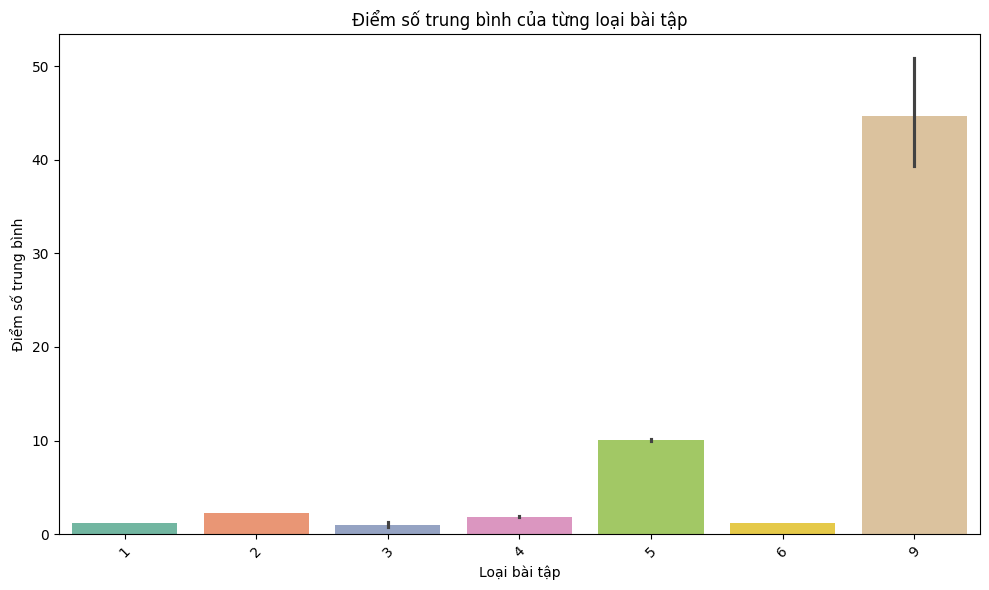

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='type', y='score', data=problem_filtered, palette='Set2')

plt.title('Điểm số trung bình của từng loại bài tập')
plt.xlabel('Loại bài tập')
plt.ylabel('Điểm số trung bình')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Kiểm định giả thuyết

In [ ]:
import scipy.stats as stats

# Lấy danh sách điểm số của từng nhóm câu hỏi
scores_by_type = [problem_filtered[problem_filtered['type'] == t]['score'].dropna() for t in problem_filtered['type'].unique()]

# Thực hiện kiểm định ANOVA
f_stat, p_value = stats.f_oneway(*scores_by_type)

# In kết quả
print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')

# Kiểm tra mức ý nghĩa (alpha = 0.05)
if p_value < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê giữa ít nhất một nhóm câu hỏi.")
else:
    print("Không có đủ bằng chứng để kết luận sự khác biệt giữa các nhóm câu hỏi.")


F-statistic: 203175.5558825259
p-value: 0.0
Có sự khác biệt có ý nghĩa thống kê giữa ít nhất một nhóm câu hỏi.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tạo danh sách các điểm số và loại câu hỏi tương ứng
scores = problem_filtered['score'].dropna()
types = problem_filtered['type'][problem_filtered['score'].notna()]

# Thực hiện kiểm định Tukey HSD
tukey = pairwise_tukeyhsd(scores, types, alpha=0.05)

# In kết quả
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   1.0489   0.0  1.0392  1.0586   True
     1      3  -0.1767   0.0 -0.2782 -0.0753   True
     1      4   0.7098   0.0  0.6935  0.7262   True
     1      5   8.9001   0.0  8.8735  8.9268   True
     1      6   0.0048 0.636 -0.0037  0.0134  False
     1      9  43.5133   0.0 43.2011 43.8255   True
     2      3  -1.2256   0.0 -1.3273 -1.1239   True
     2      4  -0.3391   0.0  -0.357 -0.3211   True
     2      5   7.8512   0.0  7.8236  7.8789   True
     2      6  -1.0441   0.0 -1.0553 -1.0328   True
     2      9  42.4644   0.0 42.1521 42.7766   True
     3      4   0.8866   0.0   0.784  0.9891   True
     3      5   9.0769   0.0  8.9722  9.1816   True
     3      6   0.1816   0.0    0.08  0.2832   True
     3      9    43.69   0.0 43.3618 44.0182   True
     4      5   8.1903   0.0  8.1596   8.221   True
     4      

Tất cả các cặp câu hỏi đều có sự khác biệt có ý nghĩa thống kê trừ cặp câu hỏi 1, 6

In [ ]:
import pandas as pd
import scipy.stats as stats

# Phân loại điểm số thành 3 nhóm
problem_filtered['score_group'] = pd.cut(
    problem_filtered['score'], bins=[0, 20, 40, float('inf')], labels=['Low', 'Medium', 'High'], include_lowest=True
)

# Tạo bảng tần suất giữa loại bài tập và nhóm điểm số
contingency_table = pd.crosstab(problem_filtered['type'], problem_filtered['score_group'])

# Chạy kiểm định Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 175363.7100680753
P-value: 0.0


- p-value < 0.05 chứng tỏ kiểm định này có ý nghĩa thống kê.
- Loại bài tập (type) có ảnh hưởng đến nhóm điểm số (score_group). Điểm số không được phân phối ngẫu nhiên giữa các loại bài tập, có sự khác biệt đáng kể giữa các nhóm.

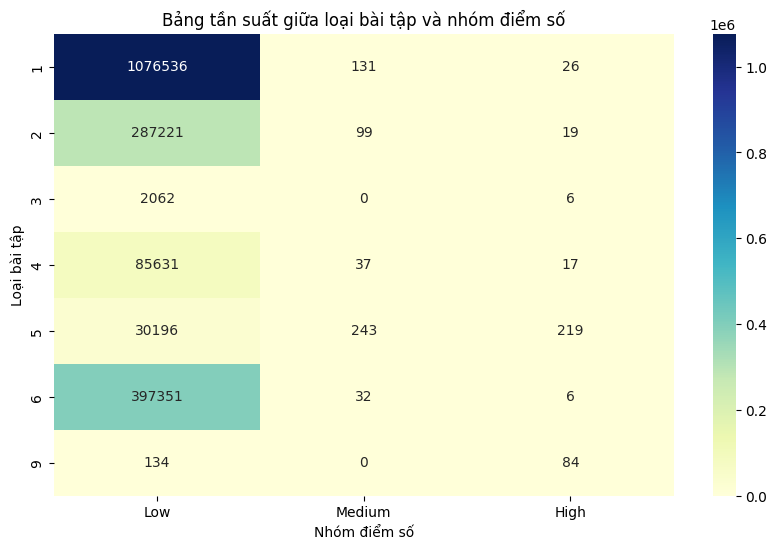

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Bảng tần suất giữa loại bài tập và nhóm điểm số")
plt.xlabel("Nhóm điểm số")
plt.ylabel("Loại bài tập")
plt.show()


### Tương quan

In [ ]:
problem.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454422 entries, 0 to 2454421
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   problem_id   2454422 non-null  int64  
 1   title        2454422 non-null  object 
 2   content      2454422 non-null  object 
 3   option       2304858 non-null  object 
 4   answer       2454422 non-null  object 
 5   score        1880050 non-null  float64
 6   type         2454422 non-null  int64  
 7   typetext     2454422 non-null  object 
 8   location     2454422 non-null  object 
 9   context_id   2454422 non-null  object 
 10  exercise_id  2454422 non-null  object 
 11  language     2454422 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 224.7+ MB


In [ ]:
problem_filtered = problem.dropna(subset=['score', 'type'])
print(problem_filtered.info())  # Xem số lượng dữ liệu sau khi lọc
print(problem_filtered.isna().sum())  # Kiểm tra còn NaN không


<class 'pandas.core.frame.DataFrame'>
Index: 1880050 entries, 0 to 2452000
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   problem_id   int64  
 1   title        object 
 2   content      object 
 3   option       object 
 4   answer       object 
 5   score        float64
 6   type         int64  
 7   typetext     object 
 8   location     object 
 9   context_id   object 
 10  exercise_id  object 
 11  language     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 186.5+ MB
None
problem_id          0
title               0
content             0
option         116488
answer              0
score               0
type                0
typetext            0
location            0
context_id          0
exercise_id         0
language            0
dtype: int64


In [ ]:
from scipy.stats import pearsonr, spearmanr

# Chuyển đổi 'type' thành số (mỗi loại một số)
problem_filtered['type_encoded'] = problem_filtered['type'].astype('category').cat.codes

# Lấy dữ liệu số
x = problem_filtered['type_encoded']
y = problem_filtered['score']

# Tính hệ số tương quan Pearson
pearson_corr, pearson_p = pearsonr(x, y)

# Hiển thị kết quả
print(f"Pearson correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")

Pearson correlation: 0.0950 (p-value: 0.0000)


<ipython-input-21-9ea060925a40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem_filtered['type_encoded'] = problem_filtered['type'].astype('category').cat.codes


In [ ]:

# Tính hệ số tương quan Spearman
spearman_corr, spearman_p = spearmanr(x, y)

# Hiển thị kết quả
print(f"Spearman correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")

Spearman correlation: 0.2627 (p-value: 0.0000)


Hệ số Pearson = 0.0950 (p-value = 0.0000)

Hệ số rất nhỏ → type và score có mối quan hệ rất yếu theo kiểu tuyến tính. Nhưng p-value = 0.0000 (rất nhỏ) → Mối quan hệ này có ý nghĩa thống kê. Hệ số Spearman = 0.2627 (p-value = 0.0000)

Hệ số Spearman cao hơn đáng kể so với Pearson → Có sự liên hệ theo thứ hạng, nhưng không phải quan hệ tuyến tính. p-value vẫn rất nhỏ → Mối quan hệ này có ý nghĩa thống kê.

### Sử dụng mô hình máy học để dự đoán giá trị: Hồi quy logistic (Softmax)

In [ ]:
import statsmodels.api as sm

# Chuyển type thành số (mỗi loại câu hỏi có một mã số)
problem_filtered['type_encoded'] = problem_filtered['type'].astype('category').cat.codes

# X là điểm số, y là loại câu hỏi (đa lớp)
X = sm.add_constant(problem_filtered[['score']])
y = problem_filtered['type_encoded']

# Hồi quy logistic đa lớp (Softmax)
model = sm.MNLogit(y, X)
result = model.fit()

# In kết quả
print(result.summary())

<ipython-input-20-f0ce74bdf555>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem_filtered['type_encoded'] = problem_filtered['type'].astype('category').cat.codes


Optimization terminated successfully.
         Current function value: 1.049053
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:           type_encoded   No. Observations:              1880050
Model:                        MNLogit   Df Residuals:                  1880038
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                 0.08875
Time:                        13:13:04   Log-Likelihood:            -1.9723e+06
converged:                       True   LL-Null:                   -2.1644e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
type_encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.6672      0.005   -559.567      0.000      -2.677      -2.658
score           

- type=2 có hệ số score âm → có xu hướng gắn với điểm thấp.
- type=4 và type=6 có hệ số score cao nhất → thường xuất hiện khi điểm cao.
- type=5 có hệ số gần bằng 0 → không bị ảnh hưởng nhiều bởi điểm.

## V. Khai phá tri thức

Khai phá tri thức nhằm xác định các mẫu, xu hướng và mối quan hệ tiềm ẩn trong bộ dữ liệu. Trong tập dữ liệu user, các trường như id, name, gender, school, year_of_birth, enroll_time chủ yếu cung cấp thông tin cá nhân về học viên và không thể hiện mối quan hệ trực tiếp giữa các dòng dữ liệu, do đó không phù hợp để khai thác tri thức.

Ngược lại, trường course_order chứa thông tin về danh sách các khóa học mà học viên đã đăng ký. Dựa vào dữ liệu này, có thể xác định được xu hướng lựa chọn khóa học, mối quan hệ giữa các khóa học, cũng như mô hình học tập của học viên. Từ đó, có thể xây dựng hệ thống gợi ý nhằm đề xuất các khóa học phù hợp dựa trên lịch sử đăng ký trước đó, giúp tối ưu hóa lộ trình học tập của học viên.

In [ ]:
user_pd = user_df.to_pandas()
user_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330294 entries, 0 to 3330293
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             object 
 1   name           object 
 2   gender         float64
 3   school         object 
 4   year_of_birth  float64
 5   course_order   object 
 6   enroll_time    object 
dtypes: float64(2), object(5)
memory usage: 177.9+ MB


In [ ]:
user_pd.isnull().sum()

id                     0
name                  54
gender                54
school                54
year_of_birth    3281764
course_order           0
enroll_time            0
dtype: int64

In [ ]:
user = user_pd.dropna(subset=['year_of_birth'])
valid_birth_years = user['year_of_birth'].map(
    lambda year: isinstance(year, (int, float)) and 1900 <= year <= 2025 if pd.notna(year) else False
)
user_cleaned = user[valid_birth_years]
user_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48333 entries, 0 to 3139148
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48333 non-null  object 
 1   name           48333 non-null  object 
 2   gender         48333 non-null  float64
 3   school         48333 non-null  object 
 4   year_of_birth  48333 non-null  float64
 5   course_order   48333 non-null  object 
 6   enroll_time    48333 non-null  object 
dtypes: float64(2), object(5)
memory usage: 3.0+ MB


### Transaction và Encode

#### Transaction

Quá trình này nhằm xây dựng một danh sách các giao dịch (course_transactions) từ cột course_order trong DataFrame user_cleaned. Các giao dịch này đại diện cho tập hợp các khóa học mà người dùng đã đăng ký.



In [ ]:
# Tạo danh sách giao dịch từ cột 'course_order'
course_transactions = []
for course_order in user_cleaned['course_order']:
    try:
        if isinstance(course_order, str):  # Kiểm tra nếu course_order là chuỗi
            course_transactions.append(ast.literal_eval(course_order))  # Parse chuỗi thành list
        else:
            course_transactions.append(course_order)  # Nếu đã là list, giữ nguyên
    except (ValueError, SyntaxError):  # Bỏ qua nếu parse lỗi
        continue
course_transactions[:10]

[array([ 682129, 2294668]),
 array([ 696679, 1704639,  943255, 1729417,  682164, 1771179, 1836502,
        1794464]),
 array([801420, 676905, 735273]),
 array([697821]),
 array([696626]),
 array([680824, 766203, 873864, 682443, 682222, 680845]),
 array([682155, 697374]),
 array([676969, 677010, 694136, 883345]),
 array([696724, 696826, 681299]),
 array([676969])]

**Nhận xét:** Danh sách course_transactions đại diện cho tập hợp các khóa học (được biểu diễn bằng ID số nguyên) mà người dùng đã đăng ký.


#### Encode

Tiếp theo nhóm tiến hành chuyển đổi transaction trên thành dạng one-hot encoding.


In [ ]:
# Chuyển đổi thành dạng one-hot encoding
transaction_encoder = TransactionEncoder()
encoded_array = transaction_encoder.fit(course_transactions).transform(course_transactions)
encoded_data = pd.DataFrame(encoded_array, columns=transaction_encoder.columns_)
encoded_data.head()

,609639,629559,674903,674910,674912,674914,674920,674923,674924,674937,...,2338360,2338758,2340899,2341406,2342499,2342500,2342508,2342532,2343425,2343522
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Nhận xét:** Sau khi mã hóa bằng TransactionEncoder,thu được kết quả như hình, với mỗi cột là một khóa học và giá trị True/False cho biết khóa học có xuất hiện trong giao dịch hay không.


### Algorithm

#### Apriori

**Thuật toán Apriori** là một phương pháp kinh điển trong khai phá tri thức, được sử dụng để tìm các luật kết hợp (association rules) trong tập dữ liệu giao dịch

**Mục địch:** Tìm ra các mẫu phổ biến trong dữ liệu, chẳng hạn như các sản phẩm thường xuyên được mua cùng nhau trong các giao dịch mua hàng.

Thuật toán Apriori hoạt động dựa trên **nguyên tắc** Apriori:
- Nếu một tập hợp các mục là phổ biến, thì tất cả các tập con của nó cũng phải phổ biến.
- Ngược lại, nếu một tập hợp các mục không phổ biến, thì tất cả các tập siêu của nó cũng không phổ biến.

In [ ]:
# Áp dụng thuật toán Apriori để tìm tập phổ biến
apriori_frequent_sets = apriori(encoded_data, min_support=0.005, use_colnames=True)
print("Tập phổ biến từ Apriori:\n", apriori_frequent_sets)

Tập phổ biến từ Apriori:
      support          itemsets
0   0.007097          (629559)
1   0.005297          (674903)
2   0.005131          (674920)
3   0.012207          (676635)
4   0.010614          (676915)
..       ...               ...
63  0.006517         (1017355)
64  0.009414  (682469, 845950)
65  0.006228  (697556, 735031)
66  0.005586  (760442, 735164)
67  0.005317  (782555, 746997)

[68 rows x 2 columns]


Kết quả này là một danh sách các tập hợp khóa học (itemsets) cùng với giá trị support (độ hỗ trợ) từ thuật toán Apriori, thể hiện mức độ phổ biến của từng khóa học trong tập dữ liệu. Thuật toán Apriori đã tìm thấy 68 mẫu phổ biến, bao gồm các khóa học đơn lẻ và một số cặp khóa học với giá trị support từ 0.5131% đến 1.2207%.

In [ ]:
# Sử dụng association_rules để tạo ra các quy tắc kết hợp từ thuật toán apriori
apriori_rules = association_rules(apriori_frequent_sets, metric="lift", min_threshold=1.0,
                                  num_itemsets = len(apriori_frequent_sets))
print("Luật từ Apriori:")
apriori_rules

Luật từ Apriori:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(682469),(845950),0.012476,0.016862,0.009414,0.754561,44.748680,1.0,0.009203,4.005622,0.990004,0.472482,0.750351,0.656421
1,(845950),(682469),0.016862,0.012476,0.009414,0.558282,44.748680,1.0,0.009203,2.235645,0.994421,0.472482,0.552702,0.656421
2,(697556),(735031),0.007904,0.012310,0.006228,0.787958,64.007361,1.0,0.006130,4.657993,0.992219,0.445266,0.785315,0.646920
3,(735031),(697556),0.012310,0.007904,0.006228,0.505882,64.007361,1.0,0.006130,2.007814,0.996646,0.445266,0.501946,0.646920
4,(760442),(735164),0.012455,0.007448,0.005586,0.448505,60.215532,1.0,0.005493,1.799747,0.995796,0.390173,0.444366,0.599252
5,(735164),(760442),0.007448,0.012455,0.005586,0.750000,60.215532,1.0,0.005493,3.950179,0.990773,0.390173,0.746847,0.599252
6,(782555),(746997),0.005835,0.016117,0.005317,0.911348,56.544492,1.0,0.005223,11.098196,0.988080,0.319652,0.909895,0.620629
7,(746997),(782555),0.016117,0.005835,0.005317,0.329910,56.544492,1.0,0.005223,1.483630,0.998406,0.319652,0.325978,0.620629


#### FP-Growth

**Thuật toán FP-Growth** là một phương pháp hiệu quả trong khai phá dữ liệu, được sử dụng để tìm các tập phổ biến (frequent itemsets) mà không cần sinh nhiều tập ứng viên như thuật toán Apriori.

**Mục đích:** Xác định các tập hợp mục phổ biến trong dữ liệu, giúp khám phá các mẫu ẩn, chẳng hạn như các sản phẩm thường xuyên được mua cùng nhau trong các giao dịch.

**Nguyên tắc hoạt động:** FP-Growth sử dụng cấu trúc FP-tree (Frequent Pattern Tree) để biểu diễn dữ liệu, giúp giảm thiểu số lần quét cơ sở dữ liệu. Thay vì tạo và kiểm tra nhiều tập ứng viên như Apriori, thuật toán nén dữ liệu vào FP-tree, sau đó khai thác trực tiếp trên cây để tìm tập phổ biến


In [ ]:
fpgrowth_frequent_sets = fpgrowth(encoded_data, min_support=0.005, use_colnames=True)
print("Tập phổ biến từ FP-Growth:\n", fpgrowth_frequent_sets)

Tập phổ biến từ FP-Growth:
      support          itemsets
0   0.009290          (696679)
1   0.011607          (801420)
2   0.005214          (697821)
3   0.006517          (697374)
4   0.010448          (883345)
..       ...               ...
63  0.007904          (697556)
64  0.005317  (782555, 746997)
65  0.009414  (682469, 845950)
66  0.005586  (760442, 735164)
67  0.006228  (697556, 735031)

[68 rows x 2 columns]


Thuật toán FP-Growth đã xác định được 68 mẫu phổ biến với support từ 0.5214% đến 1.1607%, chủ yếu là các khóa học đơn lẻ và một số cặp khóa học.

In [ ]:
# Sử dụng association_rules để tạo ra các quy tắc kết hợp từ thuật toán FP-Growth
fpgrowth_rules = association_rules(fpgrowth_frequent_sets, metric="lift",
                                   min_threshold=1.0, num_itemsets = len(fpgrowth_frequent_sets))
print("Luật từ FP-Growth:")
fpgrowth_rules

Luật từ FP-Growth:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(782555),(746997),0.005835,0.016117,0.005317,0.911348,56.544492,1.0,0.005223,11.098196,0.988080,0.319652,0.909895,0.620629
1,(746997),(782555),0.016117,0.005835,0.005317,0.329910,56.544492,1.0,0.005223,1.483630,0.998406,0.319652,0.325978,0.620629
2,(682469),(845950),0.012476,0.016862,0.009414,0.754561,44.748680,1.0,0.009203,4.005622,0.990004,0.472482,0.750351,0.656421
3,(845950),(682469),0.016862,0.012476,0.009414,0.558282,44.748680,1.0,0.009203,2.235645,0.994421,0.472482,0.552702,0.656421
4,(760442),(735164),0.012455,0.007448,0.005586,0.448505,60.215532,1.0,0.005493,1.799747,0.995796,0.390173,0.444366,0.599252
5,(735164),(760442),0.007448,0.012455,0.005586,0.750000,60.215532,1.0,0.005493,3.950179,0.990773,0.390173,0.746847,0.599252
6,(697556),(735031),0.007904,0.012310,0.006228,0.787958,64.007361,1.0,0.006130,4.657993,0.992219,0.445266,0.785315,0.646920
7,(735031),(697556),0.012310,0.007904,0.006228,0.505882,64.007361,1.0,0.006130,2.007814,0.996646,0.445266,0.501946,0.646920


### Tạo hệ khuyến nghị và dự đoán khóa học

In [ ]:
# Danh sách khóa học hiện tại của học viên mới
student_current_courses = [782555, 682469, 697556]

# Dự đoán từ luật Apriori
recommended_courses_apriori = set()
for _, rule in apriori_rules.iterrows():
    rule_antecedents = set(rule['antecedents'])
    if rule_antecedents.issubset(student_current_courses):
        recommended_courses_apriori.update(rule['consequents'])
print("Khóa học khuyến nghị từ Apriori:", recommended_courses_apriori)

# Dự đoán từ luật FP-Growth
recommended_courses_fpgrowth = set()
for _, rule in fpgrowth_rules.iterrows():
    rule_antecedents = set(rule['antecedents'])
    if rule_antecedents.issubset(student_current_courses):
        recommended_courses_fpgrowth.update(rule['consequents'])
print("Khóa học khuyến nghị từ FP-Growth:", recommended_courses_fpgrowth)

Khóa học khuyến nghị từ Apriori: {746997, 845950, 735031}
Khóa học khuyến nghị từ FP-Growth: {746997, 845950, 735031}


Sau khi thực hiện khai phá tri thức từ tệp **user.jso**n bằng hai thuật toán **Apriori** và **FP-Growth** trên trường **course_order**, nhóm đã tìm ra các mối quan hệ giữa các khóa học dựa trên tần suất xuất hiện của chúng trong cùng một danh sách đăng ký. Kết quả cho thấy có những khóa học thường được đăng ký cùng nhau, từ đó có thể khai thác để xây dựng hệ thống gợi ý khóa học cho học viên mới.
